W tym raporcie porównam szybkość uczenia i skuteczność sieci z zastosowaniem różnych architektur oraz różnych funkcji aktywacji w zadaniu regresji. Niestety nie udało mi się zaimplementować poprawnie funkcji softmax, muszę więc pominąć zadanie klasyfikacji. 

Przetestuję 4 funkcje aktywacji: 

* liniową  
* sigmoid   
* tanh   
* ReLU   

Każdą z tych funkcji przetestuję dla 3 architektur:

* 1 warstwa ukryta 15 neuronów
* 2 warstwy ukryte po 15 neuronów
* 3 warstwy ukryte po 15 neuronów

Dodatkowo każda sieć będzie miała warstwę wyjściową z 1 neuronem o liniowej funkcji aktywacji.

Wykonam najpierw testy wstępne na zbiorze `multimodal-large`, następnie na ich podstawie wybiorę zestawy, na których przeprowadzę testy na zbiorze `steps-large`.

W porównaniach nie będę wykorzystywał żadnej metody normalizacji, oraz będę aktualizował wagi po przejściu całego zbioru treningowego. Przeprowadzę uczenie z liczbą epok ograniczoną do 1000.

Krok uczenia dobiorę ręcznie na podstawie kilku prób startując od wartości `0.000003` i zwiększając lub zmniejszając go w zależności od tego, jak szybko uczy się sieć.

In [1]:
import pandas as pd
import numpy as np
import my_net as mn
import matplotlib.pyplot as plt

In [2]:
np.random.seed(21)

In [3]:
steps_train = pd.read_csv('../data/regression/steps-large-training.csv', index_col=0)
steps_test = pd.read_csv('../data/regression/steps-large-test.csv', index_col=0)
steps_test_X = steps_test[['x']].values
steps_test_Y = steps_test[['y']].values
steps_train_X = steps_train[['x']].values
steps_train_Y = steps_train[['y']].values

multimodal_train = pd.read_csv('../data/regression/multimodal-large-training.csv')
multimodal_test = pd.read_csv('../data/regression/multimodal-large-test.csv')
multimodal_test_X = multimodal_test[['x']].values
multimodal_test_Y = multimodal_test[['y']].values
multimodal_train_X = multimodal_train[['x']].values
multimodal_train_Y = multimodal_train[['y']].values

In [4]:
multimodal_val_X = multimodal_test_X[:80]
multimodal_val_Y = multimodal_test_Y[:80]
steps_val_X = steps_test_X[:80]
steps_val_Y = steps_test_Y[:80]

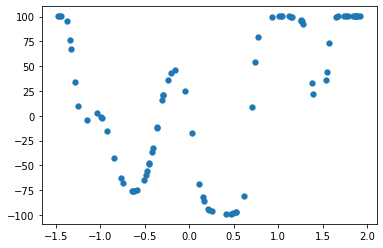

In [5]:
plt.scatter(multimodal_val_X, multimodal_val_Y, linewidth=0.25)

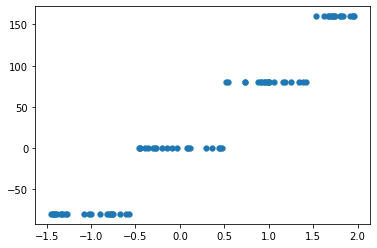

In [6]:
plt.scatter(steps_val_X, steps_val_Y, linewidth=0.25)

# testy wstępne: multimodal-large

In [7]:
def multimodal_test(n_hidden=1, activation="identity", eta=0.001):
    net = mn.Net(1)
    for i in range(n_hidden):
        net.add(mn.DenseLayer(15, activation))
    net.add(mn.DenseLayer(1, "identity"))
    net.kernel_init("xavier")

    mse, iters, mses_history = net.backpropagate(multimodal_train_X, multimodal_train_Y, 
                                   eta=eta, n_epochs=1000,
                                   required_loss=1, 
                                   verbose=1,
                                   validation_input=multimodal_val_X, 
                                   validation_output=multimodal_val_Y,
                                  )
    return mses_history

## jedna warstwa ukryta

### sigmoid

In [8]:
mses_history = multimodal_test(n_hidden=1, activation="sigmoid", eta=0.000002) 

mse after 10000 iterations (epoch 0): 5649.1590306934695
mse after 20000 iterations (epoch 1): 5613.5901947062475
mse after 30000 iterations (epoch 2): 5577.543961148583
mse after 40000 iterations (epoch 3): 5540.083132540751
mse after 50000 iterations (epoch 4): 5500.925123639121
mse after 60000 iterations (epoch 5): 5460.1810810587585
mse after 70000 iterations (epoch 6): 5418.135405976226
mse after 80000 iterations (epoch 7): 5375.085251527975
mse after 90000 iterations (epoch 8): 5331.2349371940145
mse after 100000 iterations (epoch 9): 5286.647058640546
mse after 110000 iterations (epoch 10): 5241.249185204809
mse after 120000 iterations (epoch 11): 5194.877984878816
mse after 130000 iterations (epoch 12): 5147.334289524051
mse after 140000 iterations (epoch 13): 5098.429635664297
mse after 150000 iterations (epoch 14): 5048.017601225625
mse after 160000 iterations (epoch 15): 4996.011573202501
mse after 170000 iterations (epoch 16): 4942.392149364109
mse after 180000 iterations (

mse after 1410000 iterations (epoch 140): 2603.06215712695
mse after 1420000 iterations (epoch 141): 2599.788549752074
mse after 1430000 iterations (epoch 142): 2596.5388751512683
mse after 1440000 iterations (epoch 143): 2593.312545378314
mse after 1450000 iterations (epoch 144): 2590.108948967837
mse after 1460000 iterations (epoch 145): 2586.927455352303
mse after 1470000 iterations (epoch 146): 2583.767419136698
mse after 1480000 iterations (epoch 147): 2580.6281841856976
mse after 1490000 iterations (epoch 148): 2577.509087500228
mse after 1500000 iterations (epoch 149): 2574.4094628746143
mse after 1510000 iterations (epoch 150): 2571.328644333325
mse after 1520000 iterations (epoch 151): 2568.2659693492496
mse after 1530000 iterations (epoch 152): 2565.220781844483
mse after 1540000 iterations (epoch 153): 2562.192434970862
mse after 1550000 iterations (epoch 154): 2559.1802936618637
mse after 1560000 iterations (epoch 155): 2556.183736940875
mse after 1570000 iterations (epoch 

mse after 2770000 iterations (epoch 276): 2221.6342510047316
mse after 2780000 iterations (epoch 277): 2219.12137707099
mse after 2790000 iterations (epoch 278): 2216.6171003774375
mse after 2800000 iterations (epoch 279): 2214.1214052882324
mse after 2810000 iterations (epoch 280): 2211.6342739552465
mse after 2820000 iterations (epoch 281): 2209.1556864898903
mse after 2830000 iterations (epoch 282): 2206.6856211247045
mse after 2840000 iterations (epoch 283): 2204.2240543651856
mse after 2850000 iterations (epoch 284): 2201.770961132267
mse after 2860000 iterations (epoch 285): 2199.326314895899
mse after 2870000 iterations (epoch 286): 2196.89008780016
mse after 2880000 iterations (epoch 287): 2194.4622507803133
mse after 2890000 iterations (epoch 288): 2192.042773672244
mse after 2900000 iterations (epoch 289): 2189.6316253146497
mse after 2910000 iterations (epoch 290): 2187.2287736444077
mse after 2920000 iterations (epoch 291): 2184.834185785475
mse after 2930000 iterations (ep

mse after 4120000 iterations (epoch 411): 1946.7724657624185
mse after 4130000 iterations (epoch 412): 1945.083348750985
mse after 4140000 iterations (epoch 413): 1943.3930815215022
mse after 4150000 iterations (epoch 414): 1941.7008617884385
mse after 4160000 iterations (epoch 415): 1940.00576290618
mse after 4170000 iterations (epoch 416): 1938.3067113758254
mse after 4180000 iterations (epoch 417): 1936.6024599636778
mse after 4190000 iterations (epoch 418): 1934.8915555748058
mse after 4200000 iterations (epoch 419): 1933.1723008866072
mse after 4210000 iterations (epoch 420): 1931.4427086085554
mse after 4220000 iterations (epoch 421): 1929.700447112545
mse after 4230000 iterations (epoch 422): 1927.9427761035126
mse after 4240000 iterations (epoch 423): 1926.1664710220696
mse after 4250000 iterations (epoch 424): 1924.3677350681683
mse after 4260000 iterations (epoch 425): 1922.5420982267067
mse after 4270000 iterations (epoch 426): 1920.6843036360428
mse after 4280000 iterations

mse after 5470000 iterations (epoch 546): 1554.9586968128783
mse after 5480000 iterations (epoch 547): 1552.4334731827817
mse after 5490000 iterations (epoch 548): 1549.9160781616947
mse after 5500000 iterations (epoch 549): 1547.4065187113486
mse after 5510000 iterations (epoch 550): 1544.904801028095
mse after 5520000 iterations (epoch 551): 1542.4109305510071
mse after 5530000 iterations (epoch 552): 1539.9249119704614
mse after 5540000 iterations (epoch 553): 1537.4467492371327
mse after 5550000 iterations (epoch 554): 1534.9764455713507
mse after 5560000 iterations (epoch 555): 1532.5140034727676
mse after 5570000 iterations (epoch 556): 1530.0594247302874
mse after 5580000 iterations (epoch 557): 1527.612710432221
mse after 5590000 iterations (epoch 558): 1525.1738609766292
mse after 5600000 iterations (epoch 559): 1522.742876081811
mse after 5610000 iterations (epoch 560): 1520.319754796922
mse after 5620000 iterations (epoch 561): 1517.904495512685
mse after 5630000 iterations 

mse after 6820000 iterations (epoch 681): 1280.8979065355616
mse after 6830000 iterations (epoch 682): 1279.311576820477
mse after 6840000 iterations (epoch 683): 1277.7307559401456
mse after 6850000 iterations (epoch 684): 1276.1554229972623
mse after 6860000 iterations (epoch 685): 1274.5855571950817
mse after 6870000 iterations (epoch 686): 1273.0211378373438
mse after 6880000 iterations (epoch 687): 1271.4621443281503
mse after 6890000 iterations (epoch 688): 1269.908556171793
mse after 6900000 iterations (epoch 689): 1268.3603529725317
mse after 6910000 iterations (epoch 690): 1266.8175144343297
mse after 6920000 iterations (epoch 691): 1265.280020360548
mse after 6930000 iterations (epoch 692): 1263.747850653599
mse after 6940000 iterations (epoch 693): 1262.220985314565
mse after 6950000 iterations (epoch 694): 1260.6994044427788
mse after 6960000 iterations (epoch 695): 1259.1830882353765
mse after 6970000 iterations (epoch 696): 1257.6720169868156
mse after 6980000 iterations 

mse after 8170000 iterations (epoch 816): 1109.3425109824116
mse after 8180000 iterations (epoch 817): 1108.3441440972645
mse after 8190000 iterations (epoch 818): 1107.3491593302438
mse after 8200000 iterations (epoch 819): 1106.3575446809507
mse after 8210000 iterations (epoch 820): 1105.3692881905886
mse after 8220000 iterations (epoch 821): 1104.3843779418096
mse after 8230000 iterations (epoch 822): 1103.4028020585615
mse after 8240000 iterations (epoch 823): 1102.4245487059384
mse after 8250000 iterations (epoch 824): 1101.4496060900274
mse after 8260000 iterations (epoch 825): 1100.4779624577673
mse after 8270000 iterations (epoch 826): 1099.5096060967985
mse after 8280000 iterations (epoch 827): 1098.544525335322
mse after 8290000 iterations (epoch 828): 1097.5827085419544
mse after 8300000 iterations (epoch 829): 1096.6241441255897
mse after 8310000 iterations (epoch 830): 1095.6688205352607
mse after 8320000 iterations (epoch 831): 1094.7167262599983
mse after 8330000 iterati

mse after 9520000 iterations (epoch 951): 1000.8481870913823
mse after 9530000 iterations (epoch 952): 1000.2128907364295
mse after 9540000 iterations (epoch 953): 999.5796842857075
mse after 9550000 iterations (epoch 954): 998.9485603127698
mse after 9560000 iterations (epoch 955): 998.3195114183206
mse after 9570000 iterations (epoch 956): 997.6925302301249
mse after 9580000 iterations (epoch 957): 997.0676094029171
mse after 9590000 iterations (epoch 958): 996.4447416183114
mse after 9600000 iterations (epoch 959): 995.8239195847067
mse after 9610000 iterations (epoch 960): 995.2051360372013
mse after 9620000 iterations (epoch 961): 994.588383737498
mse after 9630000 iterations (epoch 962): 993.9736554738159
mse after 9640000 iterations (epoch 963): 993.3609440607992
mse after 9650000 iterations (epoch 964): 992.7502423394268
mse after 9660000 iterations (epoch 965): 992.141543176924
mse after 9670000 iterations (epoch 966): 991.5348394666704
mse after 9680000 iterations (epoch 967)

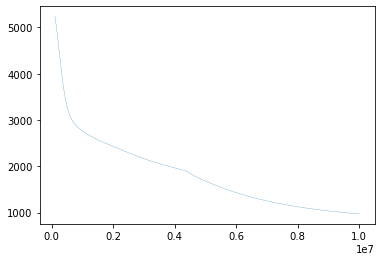

In [9]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### tanh

In [10]:
mses_history = multimodal_test(n_hidden=1, activation="tanh", eta=0.000001) # -> /2

mse after 10000 iterations (epoch 0): 5629.6540444420725
mse after 20000 iterations (epoch 1): 5570.079820728095
mse after 30000 iterations (epoch 2): 5507.6143737793445
mse after 40000 iterations (epoch 3): 5440.804103752726
mse after 50000 iterations (epoch 4): 5369.836016279262
mse after 60000 iterations (epoch 5): 5295.49115982635
mse after 70000 iterations (epoch 6): 5218.501023553184
mse after 80000 iterations (epoch 7): 5139.413051487713
mse after 90000 iterations (epoch 8): 5058.735315691864
mse after 100000 iterations (epoch 9): 4977.093524556435
mse after 110000 iterations (epoch 10): 4895.2452473901085
mse after 120000 iterations (epoch 11): 4813.984487621005
mse after 130000 iterations (epoch 12): 4734.028057890302
mse after 140000 iterations (epoch 13): 4655.921236618618
mse after 150000 iterations (epoch 14): 4579.9673793322345
mse after 160000 iterations (epoch 15): 4506.178874248659
mse after 170000 iterations (epoch 16): 4434.242047098362
mse after 180000 iterations (e

mse after 1400000 iterations (epoch 139): 2326.9320593127995
mse after 1410000 iterations (epoch 140): 2321.502369411373
mse after 1420000 iterations (epoch 141): 2316.1040246000734
mse after 1430000 iterations (epoch 142): 2310.7370213423737
mse after 1440000 iterations (epoch 143): 2305.4013467341756
mse after 1450000 iterations (epoch 144): 2300.096980381788
mse after 1460000 iterations (epoch 145): 2294.8238953458995
mse after 1470000 iterations (epoch 146): 2289.582058291109
mse after 1480000 iterations (epoch 147): 2284.3714289791487
mse after 1490000 iterations (epoch 148): 2279.19195923574
mse after 1500000 iterations (epoch 149): 2274.0435915053763
mse after 1510000 iterations (epoch 150): 2268.926257085249
mse after 1520000 iterations (epoch 151): 2263.839874100383
mse after 1530000 iterations (epoch 152): 2258.784345248997
mse after 1540000 iterations (epoch 153): 2253.759555313844
mse after 1550000 iterations (epoch 154): 2248.7653684063966
mse after 1560000 iterations (epo

mse after 2760000 iterations (epoch 275): 1742.0511979653725
mse after 2770000 iterations (epoch 276): 1739.9134963966703
mse after 2780000 iterations (epoch 277): 1737.811129552471
mse after 2790000 iterations (epoch 278): 1735.743199552852
mse after 2800000 iterations (epoch 279): 1733.7088501262303
mse after 2810000 iterations (epoch 280): 1731.707263837548
mse after 2820000 iterations (epoch 281): 1729.7376595139103
mse after 2830000 iterations (epoch 282): 1727.7992898570647
mse after 2840000 iterations (epoch 283): 1725.8914392315764
mse after 2850000 iterations (epoch 284): 1724.013421617387
mse after 2860000 iterations (epoch 285): 1722.1645787155662
mse after 2870000 iterations (epoch 286): 1720.3442781963793
mse after 2880000 iterations (epoch 287): 1718.551912079233
mse after 2890000 iterations (epoch 288): 1716.786895234583
mse after 2900000 iterations (epoch 289): 1715.0486639984513
mse after 2910000 iterations (epoch 290): 1713.3366748907993
mse after 2920000 iterations (

mse after 4110000 iterations (epoch 410): 1614.6026082857277
mse after 4120000 iterations (epoch 411): 1614.2700921253654
mse after 4130000 iterations (epoch 412): 1613.9417093017516
mse after 4140000 iterations (epoch 413): 1613.6173997969818
mse after 4150000 iterations (epoch 414): 1613.297104351655
mse after 4160000 iterations (epoch 415): 1612.9807644543005
mse after 4170000 iterations (epoch 416): 1612.6683223310351
mse after 4180000 iterations (epoch 417): 1612.3597209354484
mse after 4190000 iterations (epoch 418): 1612.0549039387183
mse after 4200000 iterations (epoch 419): 1611.7538157199422
mse after 4210000 iterations (epoch 420): 1611.4564013566905
mse after 4220000 iterations (epoch 421): 1611.1626066157735
mse after 4230000 iterations (epoch 422): 1610.872377944219
mse after 4240000 iterations (epoch 423): 1610.5856624604608
mse after 4250000 iterations (epoch 424): 1610.3024079457305
mse after 4260000 iterations (epoch 425): 1610.0225628356538
mse after 4270000 iteratio

mse after 5460000 iterations (epoch 545): 1590.6963562940898
mse after 5470000 iterations (epoch 546): 1590.5984388604834
mse after 5480000 iterations (epoch 547): 1590.501040780828
mse after 5490000 iterations (epoch 548): 1590.4041552524195
mse after 5500000 iterations (epoch 549): 1590.3077755625634
mse after 5510000 iterations (epoch 550): 1590.2118950862637
mse after 5520000 iterations (epoch 551): 1590.1165072840402
mse after 5530000 iterations (epoch 552): 1590.021605699862
mse after 5540000 iterations (epoch 553): 1589.9271839591968
mse after 5550000 iterations (epoch 554): 1589.8332357671716
mse after 5560000 iterations (epoch 555): 1589.739754906838
mse after 5570000 iterations (epoch 556): 1589.6467352375362
mse after 5580000 iterations (epoch 557): 1589.554170693354
mse after 5590000 iterations (epoch 558): 1589.4620552816748
mse after 5600000 iterations (epoch 559): 1589.3703830818085
mse after 5610000 iterations (epoch 560): 1589.2791482437046
mse after 5620000 iterations

mse after 6810000 iterations (epoch 680): 1580.2637600285077
mse after 6820000 iterations (epoch 681): 1580.1974997690286
mse after 6830000 iterations (epoch 682): 1580.1313055472522
mse after 6840000 iterations (epoch 683): 1580.0651760901935
mse after 6850000 iterations (epoch 684): 1579.999110141025
mse after 6860000 iterations (epoch 685): 1579.9331064588514
mse after 6870000 iterations (epoch 686): 1579.867163818491
mse after 6880000 iterations (epoch 687): 1579.8012810102541
mse after 6890000 iterations (epoch 688): 1579.73545683973
mse after 6900000 iterations (epoch 689): 1579.6696901275714
mse after 6910000 iterations (epoch 690): 1579.6039797092847
mse after 6920000 iterations (epoch 691): 1579.538324435019
mse after 6930000 iterations (epoch 692): 1579.472723169361
mse after 6940000 iterations (epoch 693): 1579.4071747911312
mse after 6950000 iterations (epoch 694): 1579.3416781931815
mse after 6960000 iterations (epoch 695): 1579.2762322821955
mse after 6970000 iterations (

mse after 8160000 iterations (epoch 815): 1608.9908118045348
mse after 8170000 iterations (epoch 816): 1568.301780897064
mse after 8180000 iterations (epoch 817): 1600.0426257335093
mse after 8190000 iterations (epoch 818): 1564.6749772976939
mse after 8200000 iterations (epoch 819): 1606.5025224727885
mse after 8210000 iterations (epoch 820): 1567.0489622454843
mse after 8220000 iterations (epoch 821): 1600.9074555268323
mse after 8230000 iterations (epoch 822): 1564.844673323618
mse after 8240000 iterations (epoch 823): 1605.022434711956
mse after 8250000 iterations (epoch 824): 1566.2925011871305
mse after 8260000 iterations (epoch 825): 1601.4818579517826
mse after 8270000 iterations (epoch 826): 1564.9504069906475
mse after 8280000 iterations (epoch 827): 1603.922791115178
mse after 8290000 iterations (epoch 828): 1565.7789854881144
mse after 8300000 iterations (epoch 829): 1601.7525672334114
mse after 8310000 iterations (epoch 830): 1564.9776821206146
mse after 8320000 iterations

mse after 9510000 iterations (epoch 950): 1562.7828033645078
mse after 9520000 iterations (epoch 951): 1596.4905134272335
mse after 9530000 iterations (epoch 952): 1562.7568545097288
mse after 9540000 iterations (epoch 953): 1596.4307034156989
mse after 9550000 iterations (epoch 954): 1562.7311110772253
mse after 9560000 iterations (epoch 955): 1596.371751298725
mse after 9570000 iterations (epoch 956): 1562.7055689716653
mse after 9580000 iterations (epoch 957): 1596.3136459193706
mse after 9590000 iterations (epoch 958): 1562.6802242588376
mse after 9600000 iterations (epoch 959): 1596.2563763233643
mse after 9610000 iterations (epoch 960): 1562.6550731543052
mse after 9620000 iterations (epoch 961): 1596.1999317498035
mse after 9630000 iterations (epoch 962): 1562.630112012872
mse after 9640000 iterations (epoch 963): 1596.144301622357
mse after 9650000 iterations (epoch 964): 1562.605337318801
mse after 9660000 iterations (epoch 965): 1596.089475540943
mse after 9670000 iterations 

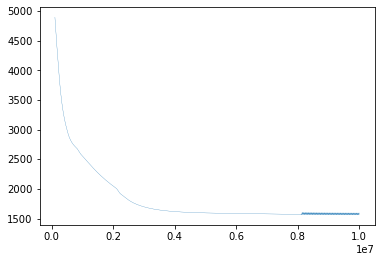

In [11]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### ReLU

In [12]:
mses_history = multimodal_test(n_hidden=1, activation="ReLU", eta=0.0000001)

mse after 10000 iterations (epoch 0): 5737.7236034761245
mse after 20000 iterations (epoch 1): 5731.768706857263
mse after 30000 iterations (epoch 2): 5725.92076830328
mse after 40000 iterations (epoch 3): 5720.131299769945
mse after 50000 iterations (epoch 4): 5714.33439037694
mse after 60000 iterations (epoch 5): 5708.48611538751
mse after 70000 iterations (epoch 6): 5702.460349037064
mse after 80000 iterations (epoch 7): 5696.289230580944
mse after 90000 iterations (epoch 8): 5690.446018464795
mse after 100000 iterations (epoch 9): 5684.712693977349
mse after 110000 iterations (epoch 10): 5678.767560477392
mse after 120000 iterations (epoch 11): 5672.614665231072
mse after 130000 iterations (epoch 12): 5666.428841128307
mse after 140000 iterations (epoch 13): 5660.430509359477
mse after 150000 iterations (epoch 14): 5654.690271256843
mse after 160000 iterations (epoch 15): 5648.889214683829
mse after 170000 iterations (epoch 16): 5642.952593312688
mse after 180000 iterations (epoch 

mse after 1410000 iterations (epoch 140): 3475.1119006459676
mse after 1420000 iterations (epoch 141): 3466.740200607859
mse after 1430000 iterations (epoch 142): 3458.4676008471915
mse after 1440000 iterations (epoch 143): 3450.470182916701
mse after 1450000 iterations (epoch 144): 3442.804661050799
mse after 1460000 iterations (epoch 145): 3435.203634560242
mse after 1470000 iterations (epoch 146): 3427.7600924557255
mse after 1480000 iterations (epoch 147): 3420.5256509141946
mse after 1490000 iterations (epoch 148): 3413.362323138862
mse after 1500000 iterations (epoch 149): 3406.3638121455383
mse after 1510000 iterations (epoch 150): 3399.4694511108078
mse after 1520000 iterations (epoch 151): 3392.646250065975
mse after 1530000 iterations (epoch 152): 3386.1441120823415
mse after 1540000 iterations (epoch 153): 3379.8222165979714
mse after 1550000 iterations (epoch 154): 3373.724626599319
mse after 1560000 iterations (epoch 155): 3367.979029366072
mse after 1570000 iterations (ep

mse after 2770000 iterations (epoch 276): 3023.663365671541
mse after 2780000 iterations (epoch 277): 3021.252102251748
mse after 2790000 iterations (epoch 278): 3018.8295212741396
mse after 2800000 iterations (epoch 279): 3016.395440968636
mse after 2810000 iterations (epoch 280): 3013.9497252161445
mse after 2820000 iterations (epoch 281): 3011.49222423983
mse after 2830000 iterations (epoch 282): 3009.021315049398
mse after 2840000 iterations (epoch 283): 3006.540120914975
mse after 2850000 iterations (epoch 284): 3004.046798302346
mse after 2860000 iterations (epoch 285): 3001.5412642077745
mse after 2870000 iterations (epoch 286): 2999.02345155703
mse after 2880000 iterations (epoch 287): 2996.4933050081354
mse after 2890000 iterations (epoch 288): 2993.9507706098134
mse after 2900000 iterations (epoch 289): 2991.396477032681
mse after 2910000 iterations (epoch 290): 2988.830343855092
mse after 2920000 iterations (epoch 291): 2986.252067712244
mse after 2930000 iterations (epoch 2

mse after 4130000 iterations (epoch 412): 2650.6665170977312
mse after 4140000 iterations (epoch 413): 2648.6212420191214
mse after 4150000 iterations (epoch 414): 2646.5882299836876
mse after 4160000 iterations (epoch 415): 2644.575206870326
mse after 4170000 iterations (epoch 416): 2642.5744800800103
mse after 4180000 iterations (epoch 417): 2640.594294682396
mse after 4190000 iterations (epoch 418): 2638.6324875193573
mse after 4200000 iterations (epoch 419): 2636.6840187134912
mse after 4210000 iterations (epoch 420): 2634.7483276628873
mse after 4220000 iterations (epoch 421): 2632.828802755578
mse after 4230000 iterations (epoch 422): 2630.920966269311
mse after 4240000 iterations (epoch 423): 2629.024493020138
mse after 4250000 iterations (epoch 424): 2627.1409589627497
mse after 4260000 iterations (epoch 425): 2625.273166626189
mse after 4270000 iterations (epoch 426): 2623.422498482947
mse after 4280000 iterations (epoch 427): 2621.5895270861133
mse after 4290000 iterations (e

mse after 5490000 iterations (epoch 548): 2459.1517392508554
mse after 5500000 iterations (epoch 549): 2457.9997337397667
mse after 5510000 iterations (epoch 550): 2456.8485011601424
mse after 5520000 iterations (epoch 551): 2455.697520672557
mse after 5530000 iterations (epoch 552): 2454.546924566506
mse after 5540000 iterations (epoch 553): 2453.397940417774
mse after 5550000 iterations (epoch 554): 2452.2518254187135
mse after 5560000 iterations (epoch 555): 2451.1071896188605
mse after 5570000 iterations (epoch 556): 2449.9635044532156
mse after 5580000 iterations (epoch 557): 2448.820273346539
mse after 5590000 iterations (epoch 558): 2447.6775470802154
mse after 5600000 iterations (epoch 559): 2446.5353635108
mse after 5610000 iterations (epoch 560): 2445.3937258926508
mse after 5620000 iterations (epoch 561): 2444.2533825915116
mse after 5630000 iterations (epoch 562): 2443.116983289541
mse after 5640000 iterations (epoch 563): 2441.9811599673517
mse after 5650000 iterations (ep

mse after 6850000 iterations (epoch 684): 2332.8886636627276
mse after 6860000 iterations (epoch 685): 2332.2959029193676
mse after 6870000 iterations (epoch 686): 2331.7087159095904
mse after 6880000 iterations (epoch 687): 2331.125967418614
mse after 6890000 iterations (epoch 688): 2330.5481141303326
mse after 6900000 iterations (epoch 689): 2329.9768136597595
mse after 6910000 iterations (epoch 690): 2329.4090377973234
mse after 6920000 iterations (epoch 691): 2328.845293704765
mse after 6930000 iterations (epoch 692): 2328.285573209291
mse after 6940000 iterations (epoch 693): 2327.7294183489016
mse after 6950000 iterations (epoch 694): 2327.1795879580686
mse after 6960000 iterations (epoch 695): 2326.6332875797307
mse after 6970000 iterations (epoch 696): 2326.09382504969
mse after 6980000 iterations (epoch 697): 2325.558359213024
mse after 6990000 iterations (epoch 698): 2325.026824629043
mse after 7000000 iterations (epoch 699): 2324.5002855496723
mse after 7010000 iterations (e

mse after 8210000 iterations (epoch 820): 2287.7182939011423
mse after 8220000 iterations (epoch 821): 2287.5616511242474
mse after 8230000 iterations (epoch 822): 2287.406998591595
mse after 8240000 iterations (epoch 823): 2287.2542637073375
mse after 8250000 iterations (epoch 824): 2287.1008324867016
mse after 8260000 iterations (epoch 825): 2286.9493616707946
mse after 8270000 iterations (epoch 826): 2286.8002605435076
mse after 8280000 iterations (epoch 827): 2286.651588015585
mse after 8290000 iterations (epoch 828): 2286.5048883009817
mse after 8300000 iterations (epoch 829): 2286.360142233821
mse after 8310000 iterations (epoch 830): 2286.217228716237
mse after 8320000 iterations (epoch 831): 2286.0710174663973
mse after 8330000 iterations (epoch 832): 2285.9267542268326
mse after 8340000 iterations (epoch 833): 2285.7846465080047
mse after 8350000 iterations (epoch 834): 2285.6453347986308
mse after 8360000 iterations (epoch 835): 2285.507835020272
mse after 8370000 iterations 

mse after 9570000 iterations (epoch 956): 2275.0804011872206
mse after 9580000 iterations (epoch 957): 2275.022793395116
mse after 9590000 iterations (epoch 958): 2274.9655699381633
mse after 9600000 iterations (epoch 959): 2274.909060482004
mse after 9610000 iterations (epoch 960): 2274.8538636718467
mse after 9620000 iterations (epoch 961): 2274.798253288501
mse after 9630000 iterations (epoch 962): 2274.7432393383515
mse after 9640000 iterations (epoch 963): 2274.6887679825604
mse after 9650000 iterations (epoch 964): 2274.634803019838
mse after 9660000 iterations (epoch 965): 2274.581315200642
mse after 9670000 iterations (epoch 966): 2274.5282792414205
mse after 9680000 iterations (epoch 967): 2274.4756779345053
mse after 9690000 iterations (epoch 968): 2274.4234928591513
mse after 9700000 iterations (epoch 969): 2274.3717096502905
mse after 9710000 iterations (epoch 970): 2274.320317471742
mse after 9720000 iterations (epoch 971): 2274.2693045927217
mse after 9730000 iterations (

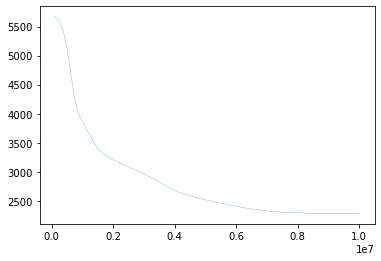

In [13]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### liniowa

In [14]:
mses_history = multimodal_test(n_hidden=1, activation="identity", eta=0.000003)

mse after 10000 iterations (epoch 0): 5326.005270852025
mse after 20000 iterations (epoch 1): 4671.703462932253
mse after 30000 iterations (epoch 2): 4357.098514498985
mse after 40000 iterations (epoch 3): 4487.934390283752
mse after 50000 iterations (epoch 4): 4358.016850778151
mse after 60000 iterations (epoch 5): 4474.44062425211
mse after 70000 iterations (epoch 6): 4357.792685230128
mse after 80000 iterations (epoch 7): 4465.892600268053
mse after 90000 iterations (epoch 8): 4357.58122845855
mse after 100000 iterations (epoch 9): 4460.024907580201
mse after 110000 iterations (epoch 10): 4357.477593496563
mse after 120000 iterations (epoch 11): 4455.737732858436
mse after 130000 iterations (epoch 12): 4357.43542611405
mse after 140000 iterations (epoch 13): 4452.462548728829
mse after 150000 iterations (epoch 14): 4357.426639518306
mse after 160000 iterations (epoch 15): 4449.876153451347
mse after 170000 iterations (epoch 16): 4357.436266871851
mse after 180000 iterations (epoch 1

mse after 1420000 iterations (epoch 141): 4422.022806228466
mse after 1430000 iterations (epoch 142): 4359.0694282594395
mse after 1440000 iterations (epoch 143): 4421.79668838952
mse after 1450000 iterations (epoch 144): 4359.098150905193
mse after 1460000 iterations (epoch 145): 4421.572043217243
mse after 1470000 iterations (epoch 146): 4359.126999795114
mse after 1480000 iterations (epoch 147): 4421.348854307975
mse after 1490000 iterations (epoch 148): 4359.155973291878
mse after 1500000 iterations (epoch 149): 4421.1271058246275
mse after 1510000 iterations (epoch 150): 4359.185069745928
mse after 1520000 iterations (epoch 151): 4420.9067824508265
mse after 1530000 iterations (epoch 152): 4359.214287497957
mse after 1540000 iterations (epoch 153): 4420.687869349914
mse after 1550000 iterations (epoch 154): 4359.243624881143
mse after 1560000 iterations (epoch 155): 4420.470352128204
mse after 1570000 iterations (epoch 156): 4359.273080223151
mse after 1580000 iterations (epoch 15

mse after 2790000 iterations (epoch 278): 4361.230085157008
mse after 2800000 iterations (epoch 279): 4409.2668796340895
mse after 2810000 iterations (epoch 280): 4361.263867212818
mse after 2820000 iterations (epoch 281): 4409.117318297393
mse after 2830000 iterations (epoch 282): 4361.297677947734
mse after 2840000 iterations (epoch 283): 4408.968596630635
mse after 2850000 iterations (epoch 284): 4361.331516291211
mse after 2860000 iterations (epoch 285): 4408.820708742822
mse after 2870000 iterations (epoch 286): 4361.365381182933
mse after 2880000 iterations (epoch 287): 4408.673648796301
mse after 2890000 iterations (epoch 288): 4361.399271572725
mse after 2900000 iterations (epoch 289): 4408.527411006072
mse after 2910000 iterations (epoch 290): 4361.433186420503
mse after 2920000 iterations (epoch 291): 4408.38198963911
mse after 2930000 iterations (epoch 292): 4361.467124696182
mse after 2940000 iterations (epoch 293): 4408.237379013712
mse after 2950000 iterations (epoch 294)

mse after 4160000 iterations (epoch 415): 4400.751780164335
mse after 4170000 iterations (epoch 416): 4363.580282850839
mse after 4180000 iterations (epoch 417): 4400.648125271912
mse after 4190000 iterations (epoch 418): 4363.614007378539
mse after 4200000 iterations (epoch 419): 4400.545005011663
mse after 4210000 iterations (epoch 420): 4363.647707084749
mse after 4220000 iterations (epoch 421): 4400.442416034499
mse after 4230000 iterations (epoch 422): 4363.681381446761
mse after 4240000 iterations (epoch 423): 4400.34035501708
mse after 4250000 iterations (epoch 424): 4363.7150299477535
mse after 4260000 iterations (epoch 425): 4400.238818661572
mse after 4270000 iterations (epoch 426): 4363.748652076729
mse after 4280000 iterations (epoch 427): 4400.137803695411
mse after 4290000 iterations (epoch 428): 4363.782247328472
mse after 4300000 iterations (epoch 429): 4400.037306871065
mse after 4310000 iterations (epoch 430): 4363.815815203501
mse after 4320000 iterations (epoch 431)

mse after 5530000 iterations (epoch 552): 4365.795126644693
mse after 5540000 iterations (epoch 553): 4394.698205101509
mse after 5550000 iterations (epoch 554): 4365.826230940285
mse after 5560000 iterations (epoch 555): 4394.624750030755
mse after 5570000 iterations (epoch 556): 4365.85728608799
mse after 5580000 iterations (epoch 557): 4394.551648270478
mse after 5590000 iterations (epoch 558): 4365.888291870246
mse after 5600000 iterations (epoch 559): 4394.478897798797
mse after 5610000 iterations (epoch 560): 4365.9192480727825
mse after 5620000 iterations (epoch 561): 4394.406496607813
mse after 5630000 iterations (epoch 562): 4365.950154484593
mse after 5640000 iterations (epoch 563): 4394.334442703495
mse after 5650000 iterations (epoch 564): 4365.981010897913
mse after 5660000 iterations (epoch 565): 4394.262734105565
mse after 5670000 iterations (epoch 566): 4366.011817108175
mse after 5680000 iterations (epoch 567): 4394.191368847384
mse after 5690000 iterations (epoch 568)

mse after 6900000 iterations (epoch 689): 4390.41706524576
mse after 6910000 iterations (epoch 690): 4367.817174918537
mse after 6920000 iterations (epoch 691): 4390.363646389071
mse after 6930000 iterations (epoch 692): 4367.844527843148
mse after 6940000 iterations (epoch 693): 4390.310470205196
mse after 6950000 iterations (epoch 694): 4367.871823016833
mse after 6960000 iterations (epoch 695): 4390.257535406918
mse after 6970000 iterations (epoch 696): 4367.899060392794
mse after 6980000 iterations (epoch 697): 4390.204840715165
mse after 6990000 iterations (epoch 698): 4367.926239926
mse after 7000000 iterations (epoch 699): 4390.152384858963
mse after 7010000 iterations (epoch 700): 4367.953361573177
mse after 7020000 iterations (epoch 701): 4390.100166575367
mse after 7030000 iterations (epoch 702): 4367.980425292792
mse after 7040000 iterations (epoch 703): 4390.0481846094
mse after 7050000 iterations (epoch 704): 4368.007431045029
mse after 7060000 iterations (epoch 705): 4389

mse after 8270000 iterations (epoch 826): 4369.544554598057
mse after 8280000 iterations (epoch 827): 4387.239449438224
mse after 8290000 iterations (epoch 828): 4369.567950355105
mse after 8300000 iterations (epoch 829): 4387.200134749151
mse after 8310000 iterations (epoch 830): 4369.591288478009
mse after 8320000 iterations (epoch 831): 4387.160990236954
mse after 8330000 iterations (epoch 832): 4369.614569008357
mse after 8340000 iterations (epoch 833): 4387.122015057126
mse after 8350000 iterations (epoch 834): 4369.637791988626
mse after 8360000 iterations (epoch 835): 4387.083208370116
mse after 8370000 iterations (epoch 836): 4369.660957462176
mse after 8380000 iterations (epoch 837): 4387.044569341278
mse after 8390000 iterations (epoch 838): 4369.684065473242
mse after 8400000 iterations (epoch 839): 4387.006097140841
mse after 8410000 iterations (epoch 840): 4369.707116066922
mse after 8420000 iterations (epoch 841): 4386.967790943881
mse after 8430000 iterations (epoch 842)

mse after 9640000 iterations (epoch 963): 4384.915088334621
mse after 9650000 iterations (epoch 964): 4371.02650166879
mse after 9660000 iterations (epoch 965): 4384.88564444441
mse after 9670000 iterations (epoch 966): 4371.046057366835
mse after 9680000 iterations (epoch 967): 4384.856323053979
mse after 9690000 iterations (epoch 968): 4371.065559943822
mse after 9700000 iterations (epoch 969): 4384.827123589082
mse after 9710000 iterations (epoch 970): 4371.085009483627
mse after 9720000 iterations (epoch 971): 4384.7980454786075
mse after 9730000 iterations (epoch 972): 4371.104406070505
mse after 9740000 iterations (epoch 973): 4384.769088154564
mse after 9750000 iterations (epoch 974): 4371.123749789077
mse after 9760000 iterations (epoch 975): 4384.740251052056
mse after 9770000 iterations (epoch 976): 4371.143040724324
mse after 9780000 iterations (epoch 977): 4384.711533609264
mse after 9790000 iterations (epoch 978): 4371.162278961588
mse after 9800000 iterations (epoch 979):

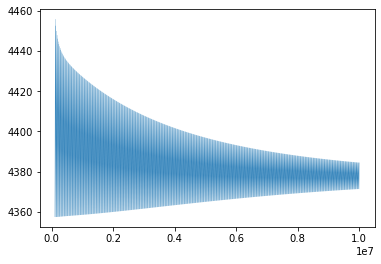

In [15]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

## dwie warstwy ukryte

### sigmoid

In [16]:
mses_history = multimodal_test(n_hidden=2, activation="sigmoid", eta=0.000001)

mse after 10000 iterations (epoch 0): 5674.235049029129
mse after 20000 iterations (epoch 1): 5650.709222133706
mse after 30000 iterations (epoch 2): 5628.823534108819
mse after 40000 iterations (epoch 3): 5608.322041630083
mse after 50000 iterations (epoch 4): 5589.040109098691
mse after 60000 iterations (epoch 5): 5570.874906935959
mse after 70000 iterations (epoch 6): 5553.7630706564905
mse after 80000 iterations (epoch 7): 5537.6640110416465
mse after 90000 iterations (epoch 8): 5522.547854434889
mse after 100000 iterations (epoch 9): 5508.387185599034
mse after 110000 iterations (epoch 10): 5495.15183679691
mse after 120000 iterations (epoch 11): 5482.8060152641665
mse after 130000 iterations (epoch 12): 5471.30712878937
mse after 140000 iterations (epoch 13): 5460.605760991061
mse after 150000 iterations (epoch 14): 5450.64635283978
mse after 160000 iterations (epoch 15): 5441.368250928674
mse after 170000 iterations (epoch 16): 5432.706875676973
mse after 180000 iterations (epoc

mse after 1410000 iterations (epoch 140): 2635.06625961095
mse after 1420000 iterations (epoch 141): 2631.7801685583972
mse after 1430000 iterations (epoch 142): 2628.576351299639
mse after 1440000 iterations (epoch 143): 2625.452380682411
mse after 1450000 iterations (epoch 144): 2622.405922820594
mse after 1460000 iterations (epoch 145): 2619.434732135206
mse after 1470000 iterations (epoch 146): 2616.536646731504
mse after 1480000 iterations (epoch 147): 2613.7095840868406
mse after 1490000 iterations (epoch 148): 2610.951537025867
mse after 1500000 iterations (epoch 149): 2608.260569961424
mse after 1510000 iterations (epoch 150): 2605.6348153811437
mse after 1520000 iterations (epoch 151): 2603.0724705613056
mse after 1530000 iterations (epoch 152): 2600.5717944909566
mse after 1540000 iterations (epoch 153): 2598.131104990557
mse after 1550000 iterations (epoch 154): 2595.7487760107274
mse after 1560000 iterations (epoch 155): 2593.4232350977136
mse after 1570000 iterations (epoc

mse after 2770000 iterations (epoch 276): 2497.7506911558025
mse after 2780000 iterations (epoch 277): 2497.5682129086463
mse after 2790000 iterations (epoch 278): 2497.3888389183194
mse after 2800000 iterations (epoch 279): 2497.2125026175718
mse after 2810000 iterations (epoch 280): 2497.039138964029
mse after 2820000 iterations (epoch 281): 2496.868684404334
mse after 2830000 iterations (epoch 282): 2496.701076839153
mse after 2840000 iterations (epoch 283): 2496.536255589023
mse after 2850000 iterations (epoch 284): 2496.3741613610227
mse after 2860000 iterations (epoch 285): 2496.2147362162477
mse after 2870000 iterations (epoch 286): 2496.057923538061
mse after 2880000 iterations (epoch 287): 2495.9036680011104
mse after 2890000 iterations (epoch 288): 2495.7519155410873
mse after 2900000 iterations (epoch 289): 2495.60261332521
mse after 2910000 iterations (epoch 290): 2495.455709723411
mse after 2920000 iterations (epoch 291): 2495.3111542802194
mse after 2930000 iterations (ep

mse after 4130000 iterations (epoch 412): 2486.6104802030814
mse after 4140000 iterations (epoch 413): 2486.5735719717622
mse after 4150000 iterations (epoch 414): 2486.536928092903
mse after 4160000 iterations (epoch 415): 2486.5005450897656
mse after 4170000 iterations (epoch 416): 2486.4644195519013
mse after 4180000 iterations (epoch 417): 2486.4285481336947
mse after 4190000 iterations (epoch 418): 2486.3929275529504
mse after 4200000 iterations (epoch 419): 2486.357554589504
mse after 4210000 iterations (epoch 420): 2486.3224260838747
mse after 4220000 iterations (epoch 421): 2486.287538935937
mse after 4230000 iterations (epoch 422): 2486.252890103632
mse after 4240000 iterations (epoch 423): 2486.218476601706
mse after 4250000 iterations (epoch 424): 2486.1842955004713
mse after 4260000 iterations (epoch 425): 2486.1503439246067
mse after 4270000 iterations (epoch 426): 2486.116619051974
mse after 4280000 iterations (epoch 427): 2486.0831181124695
mse after 4290000 iterations (

mse after 5490000 iterations (epoch 548): 2483.1535185465336
mse after 5500000 iterations (epoch 549): 2483.135822204168
mse after 5510000 iterations (epoch 550): 2483.118203295813
mse after 5520000 iterations (epoch 551): 2483.1006613442437
mse after 5530000 iterations (epoch 552): 2483.083195876918
mse after 5540000 iterations (epoch 553): 2483.0658064259105
mse after 5550000 iterations (epoch 554): 2483.048492527837
mse after 5560000 iterations (epoch 555): 2483.0312537237864
mse after 5570000 iterations (epoch 556): 2483.014089559255
mse after 5580000 iterations (epoch 557): 2482.9969995840775
mse after 5590000 iterations (epoch 558): 2482.9799833523607
mse after 5600000 iterations (epoch 559): 2482.9630404224226
mse after 5610000 iterations (epoch 560): 2482.946170356728
mse after 5620000 iterations (epoch 561): 2482.9293727218255
mse after 5630000 iterations (epoch 562): 2482.91264708829
mse after 5640000 iterations (epoch 563): 2482.8959930306614
mse after 5650000 iterations (ep

mse after 6850000 iterations (epoch 684): 2481.3078308607496
mse after 6860000 iterations (epoch 685): 2481.297566631455
mse after 6870000 iterations (epoch 686): 2481.2873404790807
mse after 6880000 iterations (epoch 687): 2481.277152228481
mse after 6890000 iterations (epoch 688): 2481.2670017055357
mse after 6900000 iterations (epoch 689): 2481.256888737137
mse after 6910000 iterations (epoch 690): 2481.2468131511873
mse after 6920000 iterations (epoch 691): 2481.2367747765866
mse after 6930000 iterations (epoch 692): 2481.2267734432276
mse after 6940000 iterations (epoch 693): 2481.216808981987
mse after 6950000 iterations (epoch 694): 2481.206881224717
mse after 6960000 iterations (epoch 695): 2481.1969900042427
mse after 6970000 iterations (epoch 696): 2481.187135154345
mse after 6980000 iterations (epoch 697): 2481.1773165097643
mse after 6990000 iterations (epoch 698): 2481.1675339061853
mse after 7000000 iterations (epoch 699): 2481.1577871802338
mse after 7010000 iterations (

mse after 8210000 iterations (epoch 820): 2480.201252252778
mse after 8220000 iterations (epoch 821): 2480.1948936137765
mse after 8230000 iterations (epoch 822): 2480.1885562228563
mse after 8240000 iterations (epoch 823): 2480.1822399950047
mse after 8250000 iterations (epoch 824): 2480.175944845624
mse after 8260000 iterations (epoch 825): 2480.1696706905313
mse after 8270000 iterations (epoch 826): 2480.163417445955
mse after 8280000 iterations (epoch 827): 2480.1571850285354
mse after 8290000 iterations (epoch 828): 2480.1509733553185
mse after 8300000 iterations (epoch 829): 2480.1447823437547
mse after 8310000 iterations (epoch 830): 2480.1386119116983
mse after 8320000 iterations (epoch 831): 2480.132461977403
mse after 8330000 iterations (epoch 832): 2480.126332459522
mse after 8340000 iterations (epoch 833): 2480.1202232771025
mse after 8350000 iterations (epoch 834): 2480.114134349586
mse after 8360000 iterations (epoch 835): 2480.108065596805
mse after 8370000 iterations (e

mse after 9570000 iterations (epoch 956): 2479.5016008482653
mse after 9580000 iterations (epoch 957): 2479.4974945037466
mse after 9590000 iterations (epoch 958): 2479.493400865
mse after 9600000 iterations (epoch 959): 2479.4893198867967
mse after 9610000 iterations (epoch 960): 2479.485251524108
mse after 9620000 iterations (epoch 961): 2479.481195732101
mse after 9630000 iterations (epoch 962): 2479.4771524661364
mse after 9640000 iterations (epoch 963): 2479.473121681773
mse after 9650000 iterations (epoch 964): 2479.469103334761
mse after 9660000 iterations (epoch 965): 2479.4650973810435
mse after 9670000 iterations (epoch 966): 2479.4611037767563
mse after 9680000 iterations (epoch 967): 2479.4571224782244
mse after 9690000 iterations (epoch 968): 2479.453153441964
mse after 9700000 iterations (epoch 969): 2479.449196624679
mse after 9710000 iterations (epoch 970): 2479.4452519832616
mse after 9720000 iterations (epoch 971): 2479.4413194747904
mse after 9730000 iterations (epoc

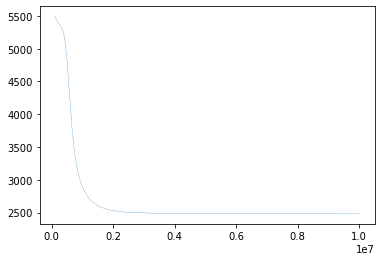

In [17]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### tanh

In [18]:
mses_history = multimodal_test(n_hidden=2, activation="tanh", eta=0.000001)

mse after 10000 iterations (epoch 0): 5572.64672931753
mse after 20000 iterations (epoch 1): 5469.3733241687105
mse after 30000 iterations (epoch 2): 5356.0051994849955
mse after 40000 iterations (epoch 3): 5211.81315404271
mse after 50000 iterations (epoch 4): 5028.70519980612
mse after 60000 iterations (epoch 5): 4813.326582278895
mse after 70000 iterations (epoch 6): 4593.965606196917
mse after 80000 iterations (epoch 7): 4473.183335360482
mse after 90000 iterations (epoch 8): 5213.307692515291
mse after 100000 iterations (epoch 9): 5061.807564064291
mse after 110000 iterations (epoch 10): 4748.992296418796
mse after 120000 iterations (epoch 11): 4175.125202210251
mse after 130000 iterations (epoch 12): 4099.25503481792
mse after 140000 iterations (epoch 13): 4428.87052677382
mse after 150000 iterations (epoch 14): 3894.822157268702
mse after 160000 iterations (epoch 15): 4170.6399757716235
mse after 170000 iterations (epoch 16): 3893.7061732248585
mse after 180000 iterations (epoch

mse after 1410000 iterations (epoch 140): 2511.194109674568
mse after 1420000 iterations (epoch 141): 2500.7820469105395
mse after 1430000 iterations (epoch 142): 2467.3887381125123
mse after 1440000 iterations (epoch 143): 2866.5458453308215
mse after 1450000 iterations (epoch 144): 2333.791605624451
mse after 1460000 iterations (epoch 145): 2856.872824445863
mse after 1470000 iterations (epoch 146): 2809.966688405942
mse after 1480000 iterations (epoch 147): 2700.4668579576296
mse after 1490000 iterations (epoch 148): 2685.6539480408437
mse after 1500000 iterations (epoch 149): 2623.7725164823933
mse after 1510000 iterations (epoch 150): 2427.14989350933
mse after 1520000 iterations (epoch 151): 2819.750678084021
mse after 1530000 iterations (epoch 152): 2834.983077114085
mse after 1540000 iterations (epoch 153): 2780.997530381292
mse after 1550000 iterations (epoch 154): 2751.342193170667
mse after 1560000 iterations (epoch 155): 2868.9918453921755
mse after 1570000 iterations (epoc

mse after 2770000 iterations (epoch 276): 1827.4345675492464
mse after 2780000 iterations (epoch 277): 1794.6241895029773
mse after 2790000 iterations (epoch 278): 1824.2349509007968
mse after 2800000 iterations (epoch 279): 1791.918841259585
mse after 2810000 iterations (epoch 280): 1821.0949368516144
mse after 2820000 iterations (epoch 281): 1789.2636722503896
mse after 2830000 iterations (epoch 282): 1818.0129522747652
mse after 2840000 iterations (epoch 283): 1786.6570709400244
mse after 2850000 iterations (epoch 284): 1814.9869308936989
mse after 2860000 iterations (epoch 285): 1784.0973391025982
mse after 2870000 iterations (epoch 286): 1812.0145226974432
mse after 2880000 iterations (epoch 287): 1781.5827764455607
mse after 2890000 iterations (epoch 288): 1809.093296233136
mse after 2900000 iterations (epoch 289): 1779.1117371675805
mse after 2910000 iterations (epoch 290): 1806.2208777858468
mse after 2920000 iterations (epoch 291): 1776.6826595139623
mse after 2930000 iteratio

mse after 4120000 iterations (epoch 411): 1661.9222970311735
mse after 4130000 iterations (epoch 412): 1661.4838889596235
mse after 4140000 iterations (epoch 413): 1660.8974569534523
mse after 4150000 iterations (epoch 414): 1660.4483853217237
mse after 4160000 iterations (epoch 415): 1659.8887251337844
mse after 4170000 iterations (epoch 416): 1659.4331304578627
mse after 4180000 iterations (epoch 417): 1658.8943969441946
mse after 4190000 iterations (epoch 418): 1658.435355572447
mse after 4200000 iterations (epoch 419): 1657.913450207189
mse after 4210000 iterations (epoch 420): 1657.4532353522561
mse after 4220000 iterations (epoch 421): 1656.94523540683
mse after 4230000 iterations (epoch 422): 1656.4855203332663
mse after 4240000 iterations (epoch 423): 1655.9893085807907
mse after 4250000 iterations (epoch 424): 1655.5313210548156
mse after 4260000 iterations (epoch 425): 1655.0453406536922
mse after 4270000 iterations (epoch 426): 1654.5899786537288
mse after 4280000 iterations

mse after 5470000 iterations (epoch 546): 1618.8422941181339
mse after 5480000 iterations (epoch 547): 1618.9895061120637
mse after 5490000 iterations (epoch 548): 1618.3682325968223
mse after 5500000 iterations (epoch 549): 1618.5261630179327
mse after 5510000 iterations (epoch 550): 1617.907416025866
mse after 5520000 iterations (epoch 551): 1618.0750007287602
mse after 5530000 iterations (epoch 552): 1617.459038633345
mse after 5540000 iterations (epoch 553): 1617.635384666343
mse after 5550000 iterations (epoch 554): 1617.0224621755603
mse after 5560000 iterations (epoch 555): 1617.2067873679448
mse after 5570000 iterations (epoch 556): 1616.5971779870752
mse after 5580000 iterations (epoch 557): 1616.7887656778344
mse after 5590000 iterations (epoch 558): 1616.1827783632718
mse after 5600000 iterations (epoch 559): 1616.3809429989822
mse after 5610000 iterations (epoch 560): 1615.778934687132
mse after 5620000 iterations (epoch 561): 1615.9829954020515
mse after 5630000 iterations

mse after 6820000 iterations (epoch 681): 1599.386709462854
mse after 6830000 iterations (epoch 682): 1599.0878242333315
mse after 6840000 iterations (epoch 683): 1598.8716461647023
mse after 6850000 iterations (epoch 684): 1598.5166928541607
mse after 6860000 iterations (epoch 685): 1598.4446675992972
mse after 6870000 iterations (epoch 686): 1598.066390661456
mse after 6880000 iterations (epoch 687): 1598.074255965264
mse after 6890000 iterations (epoch 688): 1597.6893759102877
mse after 6900000 iterations (epoch 689): 1597.742513996022
mse after 6910000 iterations (epoch 690): 1597.3595853734314
mse after 6920000 iterations (epoch 691): 1597.4386209590011
mse after 6930000 iterations (epoch 692): 1597.0619303731469
mse after 6940000 iterations (epoch 693): 1597.1556658637637
mse after 6950000 iterations (epoch 694): 1596.7872205494828
mse after 6960000 iterations (epoch 695): 1596.8890327068661
mse after 6970000 iterations (epoch 696): 1596.5295985784928
mse after 6980000 iterations

mse after 8170000 iterations (epoch 816): 1593.2364609129995
mse after 8180000 iterations (epoch 817): 1591.1858229057657
mse after 8190000 iterations (epoch 818): 1591.4083729162123
mse after 8200000 iterations (epoch 819): 1590.4087373527482
mse after 8210000 iterations (epoch 820): 1590.3736216826317
mse after 8220000 iterations (epoch 821): 1589.884366419733
mse after 8230000 iterations (epoch 822): 1589.7328637716018
mse after 8240000 iterations (epoch 823): 1589.5006989984827
mse after 8250000 iterations (epoch 824): 1589.299901689888
mse after 8260000 iterations (epoch 825): 1589.2014551061136
mse after 8270000 iterations (epoch 826): 1588.9836235400448
mse after 8280000 iterations (epoch 827): 1588.956077090345
mse after 8290000 iterations (epoch 828): 1588.7368141379325
mse after 8300000 iterations (epoch 829): 1588.7469114569317
mse after 8310000 iterations (epoch 830): 1588.5335880608193
mse after 8320000 iterations (epoch 831): 1588.5631564590906
mse after 8330000 iteration

mse after 9520000 iterations (epoch 951): 1584.9711959620283
mse after 9530000 iterations (epoch 952): 1584.900615463598
mse after 9540000 iterations (epoch 953): 1584.8827557450763
mse after 9550000 iterations (epoch 954): 1584.819385959839
mse after 9560000 iterations (epoch 955): 1584.7990048896122
mse after 9570000 iterations (epoch 956): 1584.7424018187273
mse after 9580000 iterations (epoch 957): 1584.7190139230966
mse after 9590000 iterations (epoch 958): 1584.6689053506107
mse after 9600000 iterations (epoch 959): 1584.642163139092
mse after 9610000 iterations (epoch 960): 1584.5984967119389
mse after 9620000 iterations (epoch 961): 1584.5680816398617
mse after 9630000 iterations (epoch 962): 1584.5310769248395
mse after 9640000 iterations (epoch 963): 1584.4966218529287
mse after 9650000 iterations (epoch 964): 1584.4668423704584
mse after 9660000 iterations (epoch 965): 1584.427867555666
mse after 9670000 iterations (epoch 966): 1584.4063308539376
mse after 9680000 iterations

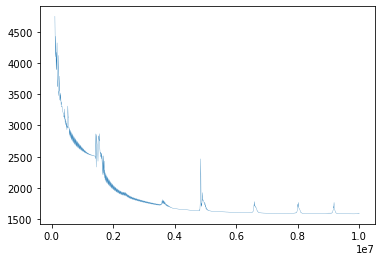

In [19]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### ReLU

In [20]:
mses_history = multimodal_test(n_hidden=2, activation="ReLU", eta=0.000000075)

mse after 10000 iterations (epoch 0): 5751.848498981279
mse after 20000 iterations (epoch 1): 5746.828168539071
mse after 30000 iterations (epoch 2): 5742.150434892528
mse after 40000 iterations (epoch 3): 5737.626448157052
mse after 50000 iterations (epoch 4): 5733.147813234313
mse after 60000 iterations (epoch 5): 5728.553500156157
mse after 70000 iterations (epoch 6): 5724.8387723360165
mse after 80000 iterations (epoch 7): 5722.268744844005
mse after 90000 iterations (epoch 8): 5720.154883953401
mse after 100000 iterations (epoch 9): 5717.6389801148125
mse after 110000 iterations (epoch 10): 5714.777166274848
mse after 120000 iterations (epoch 11): 5711.951012476758
mse after 130000 iterations (epoch 12): 5709.226341057407
mse after 140000 iterations (epoch 13): 5706.658121436231
mse after 150000 iterations (epoch 14): 5704.301201354622
mse after 160000 iterations (epoch 15): 5702.039788321728
mse after 170000 iterations (epoch 16): 5699.866292474284
mse after 180000 iterations (ep

mse after 1410000 iterations (epoch 140): 3068.608688526546
mse after 1420000 iterations (epoch 141): 3066.12959646135
mse after 1430000 iterations (epoch 142): 3063.6715094425003
mse after 1440000 iterations (epoch 143): 3061.3647003771725
mse after 1450000 iterations (epoch 144): 3059.0292098267696
mse after 1460000 iterations (epoch 145): 3056.5945599142606
mse after 1470000 iterations (epoch 146): 3054.1479947952766
mse after 1480000 iterations (epoch 147): 3051.6944681172554
mse after 1490000 iterations (epoch 148): 3049.2097365231957
mse after 1500000 iterations (epoch 149): 3046.697719925403
mse after 1510000 iterations (epoch 150): 3044.1533843932557
mse after 1520000 iterations (epoch 151): 3041.585556633393
mse after 1530000 iterations (epoch 152): 3038.9755569377185
mse after 1540000 iterations (epoch 153): 3036.3410512257665
mse after 1550000 iterations (epoch 154): 3033.6784793900792
mse after 1560000 iterations (epoch 155): 3030.973966380021
mse after 1570000 iterations (

mse after 2770000 iterations (epoch 276): 2012.8519358588826
mse after 2780000 iterations (epoch 277): 2005.1571718505656
mse after 2790000 iterations (epoch 278): 1997.7709311483754
mse after 2800000 iterations (epoch 279): 1990.7119531104158
mse after 2810000 iterations (epoch 280): 1983.9700190192666
mse after 2820000 iterations (epoch 281): 1977.4832915537256
mse after 2830000 iterations (epoch 282): 1971.243752854435
mse after 2840000 iterations (epoch 283): 1965.0946547165136
mse after 2850000 iterations (epoch 284): 1959.182187198599
mse after 2860000 iterations (epoch 285): 1953.5284499284594
mse after 2870000 iterations (epoch 286): 1948.0280592031988
mse after 2880000 iterations (epoch 287): 1942.592765177525
mse after 2890000 iterations (epoch 288): 1937.305001047525
mse after 2900000 iterations (epoch 289): 1932.169422777692
mse after 2910000 iterations (epoch 290): 1927.156037429248
mse after 2920000 iterations (epoch 291): 1922.2630728077195
mse after 2930000 iterations (

mse after 4120000 iterations (epoch 411): 1663.2737817543853
mse after 4130000 iterations (epoch 412): 1661.6152443218502
mse after 4140000 iterations (epoch 413): 1659.9600973327135
mse after 4150000 iterations (epoch 414): 1658.3027091391818
mse after 4160000 iterations (epoch 415): 1656.6247066423905
mse after 4170000 iterations (epoch 416): 1654.9535370043875
mse after 4180000 iterations (epoch 417): 1653.2699428139579
mse after 4190000 iterations (epoch 418): 1651.5830758230477
mse after 4200000 iterations (epoch 419): 1649.900090344427
mse after 4210000 iterations (epoch 420): 1648.2309799068541
mse after 4220000 iterations (epoch 421): 1646.5162784132303
mse after 4230000 iterations (epoch 422): 1644.799892989305
mse after 4240000 iterations (epoch 423): 1643.0827411413345
mse after 4250000 iterations (epoch 424): 1641.3766513713533
mse after 4260000 iterations (epoch 425): 1639.6906595355072
mse after 4270000 iterations (epoch 426): 1637.9607910070922
mse after 4280000 iteratio

mse after 5470000 iterations (epoch 546): 1429.2317701167935
mse after 5480000 iterations (epoch 547): 1428.643928584273
mse after 5490000 iterations (epoch 548): 1425.5360488388922
mse after 5500000 iterations (epoch 549): 1424.6679575633946
mse after 5510000 iterations (epoch 550): 1421.818652463052
mse after 5520000 iterations (epoch 551): 1420.7096425586979
mse after 5530000 iterations (epoch 552): 1418.0677584334494
mse after 5540000 iterations (epoch 553): 1416.7594597766265
mse after 5550000 iterations (epoch 554): 1414.2598321220157
mse after 5560000 iterations (epoch 555): 1412.8306731869966
mse after 5570000 iterations (epoch 556): 1410.424769033527
mse after 5580000 iterations (epoch 557): 1408.8845579156755
mse after 5590000 iterations (epoch 558): 1406.5590765413376
mse after 5600000 iterations (epoch 559): 1404.8480912956072
mse after 5610000 iterations (epoch 560): 1402.5709697680102
mse after 5620000 iterations (epoch 561): 1400.8069474392926
mse after 5630000 iteration

mse after 6820000 iterations (epoch 681): 1125.775135295617
mse after 6830000 iterations (epoch 682): 1114.4360128645244
mse after 6840000 iterations (epoch 683): 1118.6862000767912
mse after 6850000 iterations (epoch 684): 1108.2215685654412
mse after 6860000 iterations (epoch 685): 1112.1953185831421
mse after 6870000 iterations (epoch 686): 1101.4897023584695
mse after 6880000 iterations (epoch 687): 1106.1329285069492
mse after 6890000 iterations (epoch 688): 1094.6799591434487
mse after 6900000 iterations (epoch 689): 1100.6524569980013
mse after 6910000 iterations (epoch 690): 1087.5210723413425
mse after 6920000 iterations (epoch 691): 1096.1733644074043
mse after 6930000 iterations (epoch 692): 1080.127469895977
mse after 6940000 iterations (epoch 693): 1092.7447320043138
mse after 6950000 iterations (epoch 694): 1072.411946037432
mse after 6960000 iterations (epoch 695): 1091.3019261795866
mse after 6970000 iterations (epoch 696): 1064.4300810995883
mse after 6980000 iteration

mse after 8180000 iterations (epoch 817): 915.0128552115395
mse after 8190000 iterations (epoch 818): 814.1998697851536
mse after 8200000 iterations (epoch 819): 957.4640776548091
mse after 8210000 iterations (epoch 820): 832.2474481981874
mse after 8220000 iterations (epoch 821): 1040.1779333598256
mse after 8230000 iterations (epoch 822): 884.5496794275147
mse after 8240000 iterations (epoch 823): 1196.0447397573353
mse after 8250000 iterations (epoch 824): 1005.4796358248074
mse after 8260000 iterations (epoch 825): 1465.1054796127787
mse after 8270000 iterations (epoch 826): 1223.3937237884988
mse after 8280000 iterations (epoch 827): 1809.6299897081267
mse after 8290000 iterations (epoch 828): 1423.4711008137185
mse after 8300000 iterations (epoch 829): 1962.880482416389
mse after 8310000 iterations (epoch 830): 1360.0080207788628
mse after 8320000 iterations (epoch 831): 1698.1704619929583
mse after 8330000 iterations (epoch 832): 1099.9769714437602
mse after 8340000 iterations (

mse after 9550000 iterations (epoch 954): 738.6685098980785
mse after 9560000 iterations (epoch 955): 1042.846367495228
mse after 9570000 iterations (epoch 956): 710.8272853782393
mse after 9580000 iterations (epoch 957): 992.5515236741178
mse after 9590000 iterations (epoch 958): 688.1347962848349
mse after 9600000 iterations (epoch 959): 952.41499831025
mse after 9610000 iterations (epoch 960): 670.9481845583289
mse after 9620000 iterations (epoch 961): 923.3663405852228
mse after 9630000 iterations (epoch 962): 658.8572257637004
mse after 9640000 iterations (epoch 963): 904.2827501389008
mse after 9650000 iterations (epoch 964): 651.7738342469172
mse after 9660000 iterations (epoch 965): 894.862187084524
mse after 9670000 iterations (epoch 966): 649.0642066633476
mse after 9680000 iterations (epoch 967): 894.0299973572176
mse after 9690000 iterations (epoch 968): 650.3183281171715
mse after 9700000 iterations (epoch 969): 901.1063502465037
mse after 9710000 iterations (epoch 970): 6

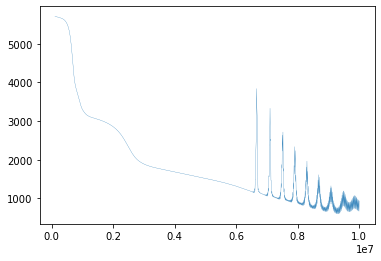

In [21]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### liniowa

In [22]:
mses_history = multimodal_test(n_hidden=2, activation="identity", eta=0.0000003)

mse after 10000 iterations (epoch 0): 5634.144537960851
mse after 20000 iterations (epoch 1): 5566.6144663947225
mse after 30000 iterations (epoch 2): 5479.995978303872
mse after 40000 iterations (epoch 3): 5360.088682671222
mse after 50000 iterations (epoch 4): 5191.084193997014
mse after 60000 iterations (epoch 5): 4964.531395483704
mse after 70000 iterations (epoch 6): 4705.531696177042
mse after 80000 iterations (epoch 7): 4495.101778828392
mse after 90000 iterations (epoch 8): 4399.259348306839
mse after 100000 iterations (epoch 9): 4378.001943209717
mse after 110000 iterations (epoch 10): 4375.770179202182
mse after 120000 iterations (epoch 11): 4375.848397941563
mse after 130000 iterations (epoch 12): 4376.099133618339
mse after 140000 iterations (epoch 13): 4376.336311000071
mse after 150000 iterations (epoch 14): 4376.538084141294
mse after 160000 iterations (epoch 15): 4376.702642181097
mse after 170000 iterations (epoch 16): 4376.833470148403
mse after 180000 iterations (epo

mse after 1410000 iterations (epoch 140): 4377.2623866710255
mse after 1420000 iterations (epoch 141): 4377.2623866710255
mse after 1430000 iterations (epoch 142): 4377.2623866710255
mse after 1440000 iterations (epoch 143): 4377.2623866710255
mse after 1450000 iterations (epoch 144): 4377.2623866710255
mse after 1460000 iterations (epoch 145): 4377.2623866710255
mse after 1470000 iterations (epoch 146): 4377.2623866710255
mse after 1480000 iterations (epoch 147): 4377.2623866710255
mse after 1490000 iterations (epoch 148): 4377.2623866710255
mse after 1500000 iterations (epoch 149): 4377.2623866710255
mse after 1510000 iterations (epoch 150): 4377.2623866710255
mse after 1520000 iterations (epoch 151): 4377.2623866710255
mse after 1530000 iterations (epoch 152): 4377.2623866710255
mse after 1540000 iterations (epoch 153): 4377.2623866710255
mse after 1550000 iterations (epoch 154): 4377.2623866710255
mse after 1560000 iterations (epoch 155): 4377.2623866710255
mse after 1570000 iterat

mse after 2760000 iterations (epoch 275): 4377.2623866710255
mse after 2770000 iterations (epoch 276): 4377.2623866710255
mse after 2780000 iterations (epoch 277): 4377.2623866710255
mse after 2790000 iterations (epoch 278): 4377.2623866710255
mse after 2800000 iterations (epoch 279): 4377.2623866710255
mse after 2810000 iterations (epoch 280): 4377.2623866710255
mse after 2820000 iterations (epoch 281): 4377.2623866710255
mse after 2830000 iterations (epoch 282): 4377.2623866710255
mse after 2840000 iterations (epoch 283): 4377.2623866710255
mse after 2850000 iterations (epoch 284): 4377.2623866710255
mse after 2860000 iterations (epoch 285): 4377.2623866710255
mse after 2870000 iterations (epoch 286): 4377.2623866710255
mse after 2880000 iterations (epoch 287): 4377.2623866710255
mse after 2890000 iterations (epoch 288): 4377.2623866710255
mse after 2900000 iterations (epoch 289): 4377.2623866710255
mse after 2910000 iterations (epoch 290): 4377.2623866710255
mse after 2920000 iterat

mse after 4110000 iterations (epoch 410): 4377.2623866710255
mse after 4120000 iterations (epoch 411): 4377.2623866710255
mse after 4130000 iterations (epoch 412): 4377.2623866710255
mse after 4140000 iterations (epoch 413): 4377.2623866710255
mse after 4150000 iterations (epoch 414): 4377.2623866710255
mse after 4160000 iterations (epoch 415): 4377.2623866710255
mse after 4170000 iterations (epoch 416): 4377.2623866710255
mse after 4180000 iterations (epoch 417): 4377.2623866710255
mse after 4190000 iterations (epoch 418): 4377.2623866710255
mse after 4200000 iterations (epoch 419): 4377.2623866710255
mse after 4210000 iterations (epoch 420): 4377.2623866710255
mse after 4220000 iterations (epoch 421): 4377.2623866710255
mse after 4230000 iterations (epoch 422): 4377.2623866710255
mse after 4240000 iterations (epoch 423): 4377.2623866710255
mse after 4250000 iterations (epoch 424): 4377.2623866710255
mse after 4260000 iterations (epoch 425): 4377.2623866710255
mse after 4270000 iterat

mse after 5460000 iterations (epoch 545): 4377.2623866710255
mse after 5470000 iterations (epoch 546): 4377.2623866710255
mse after 5480000 iterations (epoch 547): 4377.2623866710255
mse after 5490000 iterations (epoch 548): 4377.2623866710255
mse after 5500000 iterations (epoch 549): 4377.2623866710255
mse after 5510000 iterations (epoch 550): 4377.2623866710255
mse after 5520000 iterations (epoch 551): 4377.2623866710255
mse after 5530000 iterations (epoch 552): 4377.2623866710255
mse after 5540000 iterations (epoch 553): 4377.2623866710255
mse after 5550000 iterations (epoch 554): 4377.2623866710255
mse after 5560000 iterations (epoch 555): 4377.2623866710255
mse after 5570000 iterations (epoch 556): 4377.2623866710255
mse after 5580000 iterations (epoch 557): 4377.2623866710255
mse after 5590000 iterations (epoch 558): 4377.2623866710255
mse after 5600000 iterations (epoch 559): 4377.2623866710255
mse after 5610000 iterations (epoch 560): 4377.2623866710255
mse after 5620000 iterat

mse after 6810000 iterations (epoch 680): 4377.2623866710255
mse after 6820000 iterations (epoch 681): 4377.2623866710255
mse after 6830000 iterations (epoch 682): 4377.2623866710255
mse after 6840000 iterations (epoch 683): 4377.2623866710255
mse after 6850000 iterations (epoch 684): 4377.2623866710255
mse after 6860000 iterations (epoch 685): 4377.2623866710255
mse after 6870000 iterations (epoch 686): 4377.2623866710255
mse after 6880000 iterations (epoch 687): 4377.2623866710255
mse after 6890000 iterations (epoch 688): 4377.2623866710255
mse after 6900000 iterations (epoch 689): 4377.2623866710255
mse after 6910000 iterations (epoch 690): 4377.2623866710255
mse after 6920000 iterations (epoch 691): 4377.2623866710255
mse after 6930000 iterations (epoch 692): 4377.2623866710255
mse after 6940000 iterations (epoch 693): 4377.2623866710255
mse after 6950000 iterations (epoch 694): 4377.2623866710255
mse after 6960000 iterations (epoch 695): 4377.2623866710255
mse after 6970000 iterat

mse after 8160000 iterations (epoch 815): 4377.2623866710255
mse after 8170000 iterations (epoch 816): 4377.2623866710255
mse after 8180000 iterations (epoch 817): 4377.2623866710255
mse after 8190000 iterations (epoch 818): 4377.2623866710255
mse after 8200000 iterations (epoch 819): 4377.2623866710255
mse after 8210000 iterations (epoch 820): 4377.2623866710255
mse after 8220000 iterations (epoch 821): 4377.2623866710255
mse after 8230000 iterations (epoch 822): 4377.2623866710255
mse after 8240000 iterations (epoch 823): 4377.2623866710255
mse after 8250000 iterations (epoch 824): 4377.2623866710255
mse after 8260000 iterations (epoch 825): 4377.2623866710255
mse after 8270000 iterations (epoch 826): 4377.2623866710255
mse after 8280000 iterations (epoch 827): 4377.2623866710255
mse after 8290000 iterations (epoch 828): 4377.2623866710255
mse after 8300000 iterations (epoch 829): 4377.2623866710255
mse after 8310000 iterations (epoch 830): 4377.2623866710255
mse after 8320000 iterat

mse after 9510000 iterations (epoch 950): 4377.2623866710255
mse after 9520000 iterations (epoch 951): 4377.2623866710255
mse after 9530000 iterations (epoch 952): 4377.2623866710255
mse after 9540000 iterations (epoch 953): 4377.2623866710255
mse after 9550000 iterations (epoch 954): 4377.2623866710255
mse after 9560000 iterations (epoch 955): 4377.2623866710255
mse after 9570000 iterations (epoch 956): 4377.2623866710255
mse after 9580000 iterations (epoch 957): 4377.2623866710255
mse after 9590000 iterations (epoch 958): 4377.2623866710255
mse after 9600000 iterations (epoch 959): 4377.2623866710255
mse after 9610000 iterations (epoch 960): 4377.2623866710255
mse after 9620000 iterations (epoch 961): 4377.2623866710255
mse after 9630000 iterations (epoch 962): 4377.2623866710255
mse after 9640000 iterations (epoch 963): 4377.2623866710255
mse after 9650000 iterations (epoch 964): 4377.2623866710255
mse after 9660000 iterations (epoch 965): 4377.2623866710255
mse after 9670000 iterat

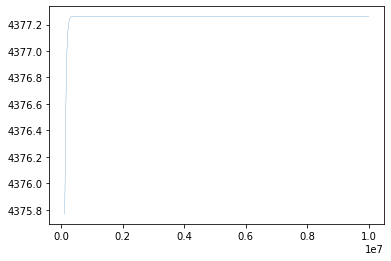

In [23]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

## trzy warstwy ukryte

### sigmoid

In [24]:
mses_history = multimodal_test(n_hidden=3, activation="sigmoid", eta=0.0000008)

mse after 10000 iterations (epoch 0): 5704.980496869431
mse after 20000 iterations (epoch 1): 5686.039647066402
mse after 30000 iterations (epoch 2): 5668.279267748113
mse after 40000 iterations (epoch 3): 5651.478081885556
mse after 50000 iterations (epoch 4): 5635.479656413232
mse after 60000 iterations (epoch 5): 5620.177600741367
mse after 70000 iterations (epoch 6): 5605.503966864249
mse after 80000 iterations (epoch 7): 5591.4198936693265
mse after 90000 iterations (epoch 8): 5577.907882818136
mse after 100000 iterations (epoch 9): 5564.965319662997
mse after 110000 iterations (epoch 10): 5552.599007081852
mse after 120000 iterations (epoch 11): 5540.820588093974
mse after 130000 iterations (epoch 12): 5529.6428035242225
mse after 140000 iterations (epoch 13): 5519.0765656634885
mse after 150000 iterations (epoch 14): 5509.1288310773225
mse after 160000 iterations (epoch 15): 5499.80123389732
mse after 170000 iterations (epoch 16): 5491.089407580597
mse after 180000 iterations (e

mse after 1420000 iterations (epoch 141): 3001.2802684643334
mse after 1430000 iterations (epoch 142): 3025.2334854890087
mse after 1440000 iterations (epoch 143): 3197.0296846810597
mse after 1450000 iterations (epoch 144): 3138.870863921004
mse after 1460000 iterations (epoch 145): 3329.2235557651175
mse after 1470000 iterations (epoch 146): 2981.859634974627
mse after 1480000 iterations (epoch 147): 3090.9507677767615
mse after 1490000 iterations (epoch 148): 3002.7430539412862
mse after 1500000 iterations (epoch 149): 3102.7464542948314
mse after 1510000 iterations (epoch 150): 2934.1276589594463
mse after 1520000 iterations (epoch 151): 3013.3780531521834
mse after 1530000 iterations (epoch 152): 2928.9588008368432
mse after 1540000 iterations (epoch 153): 2999.2819263261067
mse after 1550000 iterations (epoch 154): 2888.7078201022787
mse after 1560000 iterations (epoch 155): 2955.7077014643573
mse after 1570000 iterations (epoch 156): 2874.511779509855
mse after 1580000 iteration

mse after 2780000 iterations (epoch 277): 2496.944345994428
mse after 2790000 iterations (epoch 278): 2487.261849346915
mse after 2800000 iterations (epoch 279): 2495.314001400457
mse after 2810000 iterations (epoch 280): 2486.471916446026
mse after 2820000 iterations (epoch 281): 2493.8792447941432
mse after 2830000 iterations (epoch 282): 2485.7671635383904
mse after 2840000 iterations (epoch 283): 2492.6123645679704
mse after 2850000 iterations (epoch 284): 2485.136844365768
mse after 2860000 iterations (epoch 285): 2491.4895488895418
mse after 2870000 iterations (epoch 286): 2484.5716051252457
mse after 2880000 iterations (epoch 287): 2490.490537568974
mse after 2890000 iterations (epoch 288): 2484.063363505193
mse after 2900000 iterations (epoch 289): 2489.598184631356
mse after 2910000 iterations (epoch 290): 2483.6051620939643
mse after 2920000 iterations (epoch 291): 2488.798011700385
mse after 2930000 iterations (epoch 292): 2483.191019328858
mse after 2940000 iterations (epoc

mse after 4140000 iterations (epoch 413): 2479.0142850008756
mse after 4150000 iterations (epoch 414): 2478.7370381148744
mse after 4160000 iterations (epoch 415): 2478.999236367913
mse after 4170000 iterations (epoch 416): 2478.74044639407
mse after 4180000 iterations (epoch 417): 2478.985260263506
mse after 4190000 iterations (epoch 418): 2478.743979816103
mse after 4200000 iterations (epoch 419): 2478.9722989953016
mse after 4210000 iterations (epoch 420): 2478.7476079407597
mse after 4220000 iterations (epoch 421): 2478.9602970841347
mse after 4230000 iterations (epoch 422): 2478.7513031662934
mse after 4240000 iterations (epoch 423): 2478.9492012650107
mse after 4250000 iterations (epoch 424): 2478.755040655039
mse after 4260000 iterations (epoch 425): 2478.938960481005
mse after 4270000 iterations (epoch 426): 2478.7587982449886
mse after 4280000 iterations (epoch 427): 2478.9295258697543
mse after 4290000 iterations (epoch 428): 2478.762556348405
mse after 4300000 iterations (ep

mse after 5500000 iterations (epoch 549): 2478.915510210565
mse after 5510000 iterations (epoch 550): 2478.9165649899287
mse after 5520000 iterations (epoch 551): 2478.917940580959
mse after 5530000 iterations (epoch 552): 2478.9190264367176
mse after 5540000 iterations (epoch 553): 2478.9203888771904
mse after 5550000 iterations (epoch 554): 2478.921502523501
mse after 5560000 iterations (epoch 555): 2478.9228544175853
mse after 5570000 iterations (epoch 556): 2478.923992959351
mse after 5580000 iterations (epoch 557): 2478.92533655468
mse after 5590000 iterations (epoch 558): 2478.926497441475
mse after 5600000 iterations (epoch 559): 2478.9278346722044
mse after 5610000 iterations (epoch 560): 2478.9290156572533
mse after 5620000 iterations (epoch 561): 2478.930348182359
mse after 5630000 iterations (epoch 562): 2478.9315472860667
mse after 5640000 iterations (epoch 563): 2478.9328765233427
mse after 5650000 iterations (epoch 564): 2478.9340920009263
mse after 5660000 iterations (ep

mse after 6860000 iterations (epoch 685): 2479.100564414053
mse after 6870000 iterations (epoch 686): 2479.101963867873
mse after 6880000 iterations (epoch 687): 2479.1033627099177
mse after 6890000 iterations (epoch 688): 2479.1047609193706
mse after 6900000 iterations (epoch 689): 2479.10615847996
mse after 6910000 iterations (epoch 690): 2479.107555371628
mse after 6920000 iterations (epoch 691): 2479.1089515780086
mse after 6930000 iterations (epoch 692): 2479.1103470797125
mse after 6940000 iterations (epoch 693): 2479.1117418603512
mse after 6950000 iterations (epoch 694): 2479.1131359011306
mse after 6960000 iterations (epoch 695): 2479.1145291856983
mse after 6970000 iterations (epoch 696): 2479.1159216957926
mse after 6980000 iterations (epoch 697): 2479.117313415144
mse after 6990000 iterations (epoch 698): 2479.1187043259733
mse after 7000000 iterations (epoch 699): 2479.12009441213
mse after 7010000 iterations (epoch 700): 2479.1214836562767
mse after 7020000 iterations (ep

mse after 8220000 iterations (epoch 821): 2479.279430007316
mse after 8230000 iterations (epoch 822): 2479.2806265069703
mse after 8240000 iterations (epoch 823): 2479.281820915809
mse after 8250000 iterations (epoch 824): 2479.2830132283843
mse after 8260000 iterations (epoch 825): 2479.284203439301
mse after 8270000 iterations (epoch 826): 2479.285391543218
mse after 8280000 iterations (epoch 827): 2479.2865775348437
mse after 8290000 iterations (epoch 828): 2479.2877614089393
mse after 8300000 iterations (epoch 829): 2479.288943160317
mse after 8310000 iterations (epoch 830): 2479.2901227838397
mse after 8320000 iterations (epoch 831): 2479.2913002744203
mse after 8330000 iterations (epoch 832): 2479.2924756270213
mse after 8340000 iterations (epoch 833): 2479.293648836655
mse after 8350000 iterations (epoch 834): 2479.2948198983827
mse after 8360000 iterations (epoch 835): 2479.295988807314
mse after 8370000 iterations (epoch 836): 2479.297155558608
mse after 8380000 iterations (ep

mse after 9580000 iterations (epoch 957): 2479.421316634204
mse after 9590000 iterations (epoch 958): 2479.422195678593
mse after 9600000 iterations (epoch 959): 2479.4230722405373
mse after 9610000 iterations (epoch 960): 2479.423946318987
mse after 9620000 iterations (epoch 961): 2479.4248179129145
mse after 9630000 iterations (epoch 962): 2479.425687021308
mse after 9640000 iterations (epoch 963): 2479.426553643175
mse after 9650000 iterations (epoch 964): 2479.427417777539
mse after 9660000 iterations (epoch 965): 2479.428279423444
mse after 9670000 iterations (epoch 966): 2479.4291385799497
mse after 9680000 iterations (epoch 967): 2479.4299952461342
mse after 9690000 iterations (epoch 968): 2479.4308494210936
mse after 9700000 iterations (epoch 969): 2479.4317011039393
mse after 9710000 iterations (epoch 970): 2479.432550293802
mse after 9720000 iterations (epoch 971): 2479.433396989828
mse after 9730000 iterations (epoch 972): 2479.434241191182
mse after 9740000 iterations (epoc

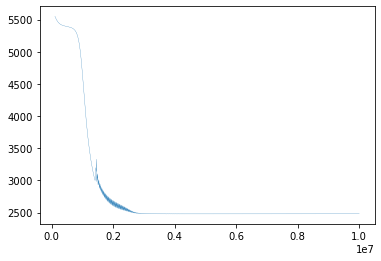

In [25]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### tanh

In [26]:
mses_history = multimodal_test(n_hidden=3, activation="tanh", eta=0.000002)

mse after 10000 iterations (epoch 0): 5555.988061294219
mse after 20000 iterations (epoch 1): 5330.479545231137
mse after 30000 iterations (epoch 2): 5154.435336704095
mse after 40000 iterations (epoch 3): 5287.6882240683035
mse after 50000 iterations (epoch 4): 5195.334438059683
mse after 60000 iterations (epoch 5): 5120.360458771491
mse after 70000 iterations (epoch 6): 5101.395136486407
mse after 80000 iterations (epoch 7): 5088.3407598528165
mse after 90000 iterations (epoch 8): 5077.596104637543
mse after 100000 iterations (epoch 9): 5067.113336920841
mse after 110000 iterations (epoch 10): 5051.376707399431
mse after 120000 iterations (epoch 11): 5039.705015520858
mse after 130000 iterations (epoch 12): 5048.719058801655
mse after 140000 iterations (epoch 13): 5044.830519810739
mse after 150000 iterations (epoch 14): 5041.650749562825
mse after 160000 iterations (epoch 15): 5004.795119611845
mse after 170000 iterations (epoch 16): 5044.464930229899
mse after 180000 iterations (ep

mse after 1420000 iterations (epoch 141): 4009.2008710003247
mse after 1430000 iterations (epoch 142): 3984.6336036170906
mse after 1440000 iterations (epoch 143): 4034.3206373496423
mse after 1450000 iterations (epoch 144): 4181.253899397288
mse after 1460000 iterations (epoch 145): 3960.556518526378
mse after 1470000 iterations (epoch 146): 3906.1924655482844
mse after 1480000 iterations (epoch 147): 3910.640828062749
mse after 1490000 iterations (epoch 148): 3948.2942566570914
mse after 1500000 iterations (epoch 149): 4014.459116275869
mse after 1510000 iterations (epoch 150): 4294.056233227568
mse after 1520000 iterations (epoch 151): 3932.159597710869
mse after 1530000 iterations (epoch 152): 3972.146385908728
mse after 1540000 iterations (epoch 153): 4023.2567263719257
mse after 1550000 iterations (epoch 154): 3928.4612295216766
mse after 1560000 iterations (epoch 155): 3943.576022217569
mse after 1570000 iterations (epoch 156): 4129.954566397961
mse after 1580000 iterations (epo

mse after 2780000 iterations (epoch 277): 3862.819067600263
mse after 2790000 iterations (epoch 278): 3858.412520791052
mse after 2800000 iterations (epoch 279): 3862.3641418836137
mse after 2810000 iterations (epoch 280): 3799.820885542421
mse after 2820000 iterations (epoch 281): 3814.12619551595
mse after 2830000 iterations (epoch 282): 3877.3692318515677
mse after 2840000 iterations (epoch 283): 3960.561778280274
mse after 2850000 iterations (epoch 284): 3834.590358339664
mse after 2860000 iterations (epoch 285): 3873.7554433744313
mse after 2870000 iterations (epoch 286): 3868.725233482916
mse after 2880000 iterations (epoch 287): 3968.7376605082013
mse after 2890000 iterations (epoch 288): 3897.8638975045787
mse after 2900000 iterations (epoch 289): 3821.1174676308424
mse after 2910000 iterations (epoch 290): 3816.379511206166
mse after 2920000 iterations (epoch 291): 3861.866132956042
mse after 2930000 iterations (epoch 292): 3888.48722336433
mse after 2940000 iterations (epoch 

mse after 4140000 iterations (epoch 413): 3858.979058787457
mse after 4150000 iterations (epoch 414): 3839.01256570329
mse after 4160000 iterations (epoch 415): 3859.9368500034407
mse after 4170000 iterations (epoch 416): 3839.255261614103
mse after 4180000 iterations (epoch 417): 3859.3374073842037
mse after 4190000 iterations (epoch 418): 3838.3596579259947
mse after 4200000 iterations (epoch 419): 3858.412646007394
mse after 4210000 iterations (epoch 420): 3839.124513740307
mse after 4220000 iterations (epoch 421): 3857.9391798924944
mse after 4230000 iterations (epoch 422): 3840.630387003565
mse after 4240000 iterations (epoch 423): 3857.5166414943874
mse after 4250000 iterations (epoch 424): 3843.4112098347177
mse after 4260000 iterations (epoch 425): 3857.0263673770664
mse after 4270000 iterations (epoch 426): 3852.155940432979
mse after 4280000 iterations (epoch 427): 3856.536438764272
mse after 4290000 iterations (epoch 428): 3872.46163569643
mse after 4300000 iterations (epoch

mse after 5500000 iterations (epoch 549): 3822.501556844102
mse after 5510000 iterations (epoch 550): 3830.8276648961037
mse after 5520000 iterations (epoch 551): 3838.848230880546
mse after 5530000 iterations (epoch 552): 3833.9510375774494
mse after 5540000 iterations (epoch 553): 3821.5851648954267
mse after 5550000 iterations (epoch 554): 3829.6397921541065
mse after 5560000 iterations (epoch 555): 3812.3293103701485
mse after 5570000 iterations (epoch 556): 3810.353401387055
mse after 5580000 iterations (epoch 557): 3407.7187435733103
mse after 5590000 iterations (epoch 558): 4484.529957548242
mse after 5600000 iterations (epoch 559): 4307.766888932955
mse after 5610000 iterations (epoch 560): 4185.229765787172
mse after 5620000 iterations (epoch 561): 4042.70966603423
mse after 5630000 iterations (epoch 562): 3974.8343253281737
mse after 5640000 iterations (epoch 563): 3958.505932303707
mse after 5650000 iterations (epoch 564): 3916.559831081721
mse after 5660000 iterations (epoc

mse after 6860000 iterations (epoch 685): 3784.2216925450944
mse after 6870000 iterations (epoch 686): 3778.089425812199
mse after 6880000 iterations (epoch 687): 3785.7188895855843
mse after 6890000 iterations (epoch 688): 3780.0200717541347
mse after 6900000 iterations (epoch 689): 3789.595044142107
mse after 6910000 iterations (epoch 690): 3786.547892204589
mse after 6920000 iterations (epoch 691): 3794.360624461159
mse after 6930000 iterations (epoch 692): 3793.7757282416524
mse after 6940000 iterations (epoch 693): 3797.9200969150006
mse after 6950000 iterations (epoch 694): 3797.015051858428
mse after 6960000 iterations (epoch 695): 3806.9456363044837
mse after 6970000 iterations (epoch 696): 3793.5969367927005
mse after 6980000 iterations (epoch 697): 3801.5422410873834
mse after 6990000 iterations (epoch 698): 3794.918323424751
mse after 7000000 iterations (epoch 699): 3803.036530976683
mse after 7010000 iterations (epoch 700): 3789.548743215569
mse after 7020000 iterations (ep

mse after 8220000 iterations (epoch 821): 3780.0092178854197
mse after 8230000 iterations (epoch 822): 3773.1603808149557
mse after 8240000 iterations (epoch 823): 3779.6728741301667
mse after 8250000 iterations (epoch 824): 3772.0228469402746
mse after 8260000 iterations (epoch 825): 3779.065745224552
mse after 8270000 iterations (epoch 826): 3770.7493344068425
mse after 8280000 iterations (epoch 827): 3778.2467511972295
mse after 8290000 iterations (epoch 828): 3769.4885871378224
mse after 8300000 iterations (epoch 829): 3777.36401101246
mse after 8310000 iterations (epoch 830): 3768.5623442657607
mse after 8320000 iterations (epoch 831): 3776.700907764439
mse after 8330000 iterations (epoch 832): 3768.55028567744
mse after 8340000 iterations (epoch 833): 3776.734584377915
mse after 8350000 iterations (epoch 834): 3770.641886309478
mse after 8360000 iterations (epoch 835): 3777.9510163611585
mse after 8370000 iterations (epoch 836): 3776.784345793596
mse after 8380000 iterations (epo

mse after 9580000 iterations (epoch 957): 4086.1842006100806
mse after 9590000 iterations (epoch 958): 4060.0886157499017
mse after 9600000 iterations (epoch 959): 4056.338121475669
mse after 9610000 iterations (epoch 960): 4052.303008681979
mse after 9620000 iterations (epoch 961): 4049.440866250996
mse after 9630000 iterations (epoch 962): 4046.4440866141463
mse after 9640000 iterations (epoch 963): 4043.6740321815987
mse after 9650000 iterations (epoch 964): 4041.110207676418
mse after 9660000 iterations (epoch 965): 4038.3833162874434
mse after 9670000 iterations (epoch 966): 4036.123898438619
mse after 9680000 iterations (epoch 967): 4033.3168170938925
mse after 9690000 iterations (epoch 968): 4031.6273606778423
mse after 9700000 iterations (epoch 969): 4029.2200679253815
mse after 9710000 iterations (epoch 970): 4026.9087671129464
mse after 9720000 iterations (epoch 971): 4024.3353462655514
mse after 9730000 iterations (epoch 972): 4022.303184943452
mse after 9740000 iterations (

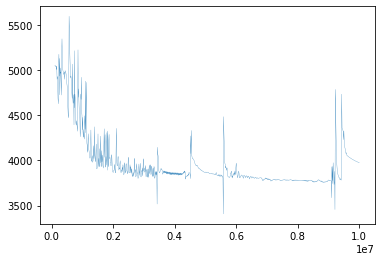

In [27]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### ReLU

In [28]:
mses_history = multimodal_test(n_hidden=3, activation="ReLU", eta=0.0000001)

mse after 10000 iterations (epoch 0): 5688.72883115661
mse after 20000 iterations (epoch 1): 5682.753254565143
mse after 30000 iterations (epoch 2): 5676.461132008591
mse after 40000 iterations (epoch 3): 5668.380800176814
mse after 50000 iterations (epoch 4): 5657.217949106453
mse after 60000 iterations (epoch 5): 5647.9729431663845
mse after 70000 iterations (epoch 6): 5637.462488203854
mse after 80000 iterations (epoch 7): 5625.201362867305
mse after 90000 iterations (epoch 8): 5610.681248620605
mse after 100000 iterations (epoch 9): 5593.155792123158
mse after 110000 iterations (epoch 10): 5571.9562744508385
mse after 120000 iterations (epoch 11): 5546.066511476029
mse after 130000 iterations (epoch 12): 5513.502217977056
mse after 140000 iterations (epoch 13): 5472.034753331922
mse after 150000 iterations (epoch 14): 5418.42290069318
mse after 160000 iterations (epoch 15): 5348.027774469462
mse after 170000 iterations (epoch 16): 5254.339351945409
mse after 180000 iterations (epoc

mse after 1410000 iterations (epoch 140): 2533.9750661579724
mse after 1420000 iterations (epoch 141): 1984.241086171495
mse after 1430000 iterations (epoch 142): 2478.779997924449
mse after 1440000 iterations (epoch 143): 1950.1042557073426
mse after 1450000 iterations (epoch 144): 2413.884263693207
mse after 1460000 iterations (epoch 145): 1924.1378783598018
mse after 1470000 iterations (epoch 146): 2365.2554693145075
mse after 1480000 iterations (epoch 147): 1898.5828879194983
mse after 1490000 iterations (epoch 148): 2308.079152952409
mse after 1500000 iterations (epoch 149): 1873.2034569579191
mse after 1510000 iterations (epoch 150): 2252.7843168165646
mse after 1520000 iterations (epoch 151): 1848.592129382006
mse after 1530000 iterations (epoch 152): 2197.6579274436613
mse after 1540000 iterations (epoch 153): 1826.204142817013
mse after 1550000 iterations (epoch 154): 2146.4475956390024
mse after 1560000 iterations (epoch 155): 1804.4214766161829
mse after 1570000 iterations (

mse after 2760000 iterations (epoch 275): 1086.253666776999
mse after 2770000 iterations (epoch 276): 1499.8011451827315
mse after 2780000 iterations (epoch 277): 1483.1828602243654
mse after 2790000 iterations (epoch 278): 1165.2041435853794
mse after 2800000 iterations (epoch 279): 1039.1198523840085
mse after 2810000 iterations (epoch 280): 1973.1555431732668
mse after 2820000 iterations (epoch 281): 921.5800582829354
mse after 2830000 iterations (epoch 282): 1527.7207478175562
mse after 2840000 iterations (epoch 283): 1163.8125867376482
mse after 2850000 iterations (epoch 284): 2035.81205441811
mse after 2860000 iterations (epoch 285): 1026.4075252556909
mse after 2870000 iterations (epoch 286): 1417.408100950343
mse after 2880000 iterations (epoch 287): 1666.3182408153352
mse after 2890000 iterations (epoch 288): 1620.0717783959176
mse after 2900000 iterations (epoch 289): 999.229852584788
mse after 2910000 iterations (epoch 290): 1692.6830629911456
mse after 2920000 iterations (e

mse after 4120000 iterations (epoch 411): 1087.3469980730058
mse after 4130000 iterations (epoch 412): 937.2284968914834
mse after 4140000 iterations (epoch 413): 951.3871424017564
mse after 4150000 iterations (epoch 414): 914.1004103677518
mse after 4160000 iterations (epoch 415): 844.9040757197533
mse after 4170000 iterations (epoch 416): 997.7425166668611
mse after 4180000 iterations (epoch 417): 1146.7735679594387
mse after 4190000 iterations (epoch 418): 718.109987652171
mse after 4200000 iterations (epoch 419): 708.6874336212891
mse after 4210000 iterations (epoch 420): 767.1383535885955
mse after 4220000 iterations (epoch 421): 764.8757303518063
mse after 4230000 iterations (epoch 422): 1059.2748271600722
mse after 4240000 iterations (epoch 423): 1002.1063332445544
mse after 4250000 iterations (epoch 424): 1102.3827556704407
mse after 4260000 iterations (epoch 425): 1034.1832625040008
mse after 4270000 iterations (epoch 426): 936.6489278143829
mse after 4280000 iterations (epoch

mse after 5490000 iterations (epoch 548): 546.3338299134442
mse after 5500000 iterations (epoch 549): 1330.3218549737753
mse after 5510000 iterations (epoch 550): 311.9574402411653
mse after 5520000 iterations (epoch 551): 357.19360453366255
mse after 5530000 iterations (epoch 552): 338.264482209475
mse after 5540000 iterations (epoch 553): 917.3097926471776
mse after 5550000 iterations (epoch 554): 470.771419121293
mse after 5560000 iterations (epoch 555): 1114.1918699054288
mse after 5570000 iterations (epoch 556): 443.0652059729258
mse after 5580000 iterations (epoch 557): 993.1778910527448
mse after 5590000 iterations (epoch 558): 449.85291041068274
mse after 5600000 iterations (epoch 559): 714.5131158781819
mse after 5610000 iterations (epoch 560): 388.8276208499734
mse after 5620000 iterations (epoch 561): 571.3851592330564
mse after 5630000 iterations (epoch 562): 521.0631334173888
mse after 5640000 iterations (epoch 563): 1008.047696012232
mse after 5650000 iterations (epoch 56

mse after 6850000 iterations (epoch 684): 334.62469516523726
mse after 6860000 iterations (epoch 685): 714.0332070214413
mse after 6870000 iterations (epoch 686): 421.8595614289599
mse after 6880000 iterations (epoch 687): 1114.5067627531475
mse after 6890000 iterations (epoch 688): 434.4983154433932
mse after 6900000 iterations (epoch 689): 554.065519446355
mse after 6910000 iterations (epoch 690): 369.1465664794737
mse after 6920000 iterations (epoch 691): 953.4722441582759
mse after 6930000 iterations (epoch 692): 392.4735062603915
mse after 6940000 iterations (epoch 693): 498.2053007744362
mse after 6950000 iterations (epoch 694): 316.9181930310265
mse after 6960000 iterations (epoch 695): 859.1192396599514
mse after 6970000 iterations (epoch 696): 353.8181489641141
mse after 6980000 iterations (epoch 697): 528.1133873112242
mse after 6990000 iterations (epoch 698): 352.9978436081418
mse after 7000000 iterations (epoch 699): 926.5926848771691
mse after 7010000 iterations (epoch 700

mse after 8210000 iterations (epoch 820): 308.66666348813425
mse after 8220000 iterations (epoch 821): 949.4357919193484
mse after 8230000 iterations (epoch 822): 321.7162325396849
mse after 8240000 iterations (epoch 823): 454.1799929198863
mse after 8250000 iterations (epoch 824): 250.61848214155725
mse after 8260000 iterations (epoch 825): 679.2718485320769
mse after 8270000 iterations (epoch 826): 256.57823562618796
mse after 8280000 iterations (epoch 827): 717.9590908143934
mse after 8290000 iterations (epoch 828): 314.7777738111914
mse after 8300000 iterations (epoch 829): 900.8482781289383
mse after 8310000 iterations (epoch 830): 276.3922531427585
mse after 8320000 iterations (epoch 831): 458.01072348650706
mse after 8330000 iterations (epoch 832): 276.5165829254911
mse after 8340000 iterations (epoch 833): 528.9150402634596
mse after 8350000 iterations (epoch 834): 359.3964041333769
mse after 8360000 iterations (epoch 835): 835.3110139591483
mse after 8370000 iterations (epoch 

mse after 9570000 iterations (epoch 956): 302.7437870011563
mse after 9580000 iterations (epoch 957): 372.7566967191069
mse after 9590000 iterations (epoch 958): 225.87073047179155
mse after 9600000 iterations (epoch 959): 569.0645210862577
mse after 9610000 iterations (epoch 960): 253.60131289944337
mse after 9620000 iterations (epoch 961): 686.0280525870354
mse after 9630000 iterations (epoch 962): 273.9021378125289
mse after 9640000 iterations (epoch 963): 735.8706983596869
mse after 9650000 iterations (epoch 964): 241.35139115128533
mse after 9660000 iterations (epoch 965): 521.0701705560308
mse after 9670000 iterations (epoch 966): 285.1444702015308
mse after 9680000 iterations (epoch 967): 846.3689902867649
mse after 9690000 iterations (epoch 968): 330.2904283631502
mse after 9700000 iterations (epoch 969): 351.3112618008276
mse after 9710000 iterations (epoch 970): 209.14487497323694
mse after 9720000 iterations (epoch 971): 556.4205561122664
mse after 9730000 iterations (epoch 

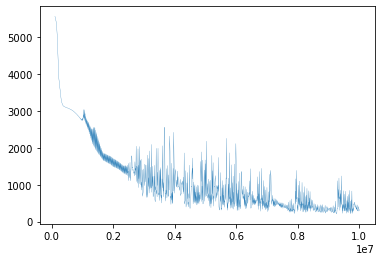

In [29]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### liniowa

In [30]:
mses_history = multimodal_test(n_hidden=3, activation="identity", eta=0.0000003)

mse after 10000 iterations (epoch 0): 5640.35401377582
mse after 20000 iterations (epoch 1): 5556.791063452569
mse after 30000 iterations (epoch 2): 5412.497682516843
mse after 40000 iterations (epoch 3): 5129.097685131028
mse after 50000 iterations (epoch 4): 4637.715428238377
mse after 60000 iterations (epoch 5): 4355.9589822456155
mse after 70000 iterations (epoch 6): 4476.3588932641305
mse after 80000 iterations (epoch 7): 4357.776610861429
mse after 90000 iterations (epoch 8): 4504.060400847119
mse after 100000 iterations (epoch 9): 4359.870563410564
mse after 110000 iterations (epoch 10): 4516.810342361979
mse after 120000 iterations (epoch 11): 4360.313965042804
mse after 130000 iterations (epoch 12): 4518.124706062895
mse after 140000 iterations (epoch 13): 4360.296467781462
mse after 150000 iterations (epoch 14): 4516.442921310283
mse after 160000 iterations (epoch 15): 4360.201438204191
mse after 170000 iterations (epoch 16): 4514.379668604861
mse after 180000 iterations (epo

mse after 1420000 iterations (epoch 141): 4358.517394694568
mse after 1430000 iterations (epoch 142): 4460.957851188958
mse after 1440000 iterations (epoch 143): 4358.517525138153
mse after 1450000 iterations (epoch 144): 4460.570466930924
mse after 1460000 iterations (epoch 145): 4358.517908204065
mse after 1470000 iterations (epoch 146): 4460.188291009407
mse after 1480000 iterations (epoch 147): 4358.518535992886
mse after 1490000 iterations (epoch 148): 4459.8111746082795
mse after 1500000 iterations (epoch 149): 4358.519400965316
mse after 1510000 iterations (epoch 150): 4459.438974805294
mse after 1520000 iterations (epoch 151): 4358.520495922675
mse after 1530000 iterations (epoch 152): 4459.071554288056
mse after 1540000 iterations (epoch 153): 4358.521813988603
mse after 1550000 iterations (epoch 154): 4458.708781086059
mse after 1560000 iterations (epoch 155): 4358.523348591873
mse after 1570000 iterations (epoch 156): 4458.350528317727
mse after 1580000 iterations (epoch 157

mse after 2790000 iterations (epoch 278): 4441.972583279729
mse after 2800000 iterations (epoch 279): 4358.885363764251
mse after 2810000 iterations (epoch 280): 4441.763079788141
mse after 2820000 iterations (epoch 281): 4358.894064620894
mse after 2830000 iterations (epoch 282): 4441.554870513043
mse after 2840000 iterations (epoch 283): 4358.902829640416
mse after 2850000 iterations (epoch 284): 4441.347937570473
mse after 2860000 iterations (epoch 285): 4358.911658067662
mse after 2870000 iterations (epoch 286): 4441.142263496285
mse after 2880000 iterations (epoch 287): 4358.920549164193
mse after 2890000 iterations (epoch 288): 4440.937831233353
mse after 2900000 iterations (epoch 289): 4358.929502207696
mse after 2910000 iterations (epoch 290): 4440.734624119233
mse after 2920000 iterations (epoch 291): 4358.938516491429
mse after 2930000 iterations (epoch 292): 4440.532625874253
mse after 2940000 iterations (epoch 293): 4358.947591323695
mse after 2950000 iterations (epoch 294)

mse after 4160000 iterations (epoch 415): 4359.594743852146
mse after 4170000 iterations (epoch 416): 4429.875254128017
mse after 4180000 iterations (epoch 417): 4359.6066185696645
mse after 4190000 iterations (epoch 418): 4429.727598554673
mse after 4200000 iterations (epoch 419): 4359.618527119799
mse after 4210000 iterations (epoch 420): 4429.580573739185
mse after 4220000 iterations (epoch 421): 4359.630469225629
mse after 4230000 iterations (epoch 422): 4429.434174772071
mse after 4240000 iterations (epoch 423): 4359.642444612774
mse after 4250000 iterations (epoch 424): 4429.288396813995
mse after 4260000 iterations (epoch 425): 4359.654453009337
mse after 4270000 iterations (epoch 426): 4429.143235094283
mse after 4280000 iterations (epoch 427): 4359.666494145861
mse after 4290000 iterations (epoch 428): 4428.998684909472
mse after 4300000 iterations (epoch 429): 4359.678567755274
mse after 4310000 iterations (epoch 430): 4428.854741621906
mse after 4320000 iterations (epoch 431

mse after 5530000 iterations (epoch 552): 4421.07049790503
mse after 5540000 iterations (epoch 553): 4360.480727218501
mse after 5550000 iterations (epoch 554): 4420.957163174355
mse after 5560000 iterations (epoch 555): 4360.494388496541
mse after 5570000 iterations (epoch 556): 4420.844233443597
mse after 5580000 iterations (epoch 557): 4360.508068706959
mse after 5590000 iterations (epoch 558): 4420.731706480862
mse after 5600000 iterations (epoch 559): 4360.521767679158
mse after 5610000 iterations (epoch 560): 4420.619580074892
mse after 5620000 iterations (epoch 561): 4360.535485243505
mse after 5630000 iterations (epoch 562): 4420.507852034757
mse after 5640000 iterations (epoch 563): 4360.54922123133
mse after 5650000 iterations (epoch 564): 4420.39652018956
mse after 5660000 iterations (epoch 565): 4360.56297547491
mse after 5670000 iterations (epoch 566): 4420.28558238814
mse after 5680000 iterations (epoch 567): 4360.576747807461
mse after 5690000 iterations (epoch 568): 442

mse after 6900000 iterations (epoch 689): 4361.444982148044
mse after 6910000 iterations (epoch 690): 4414.098613104335
mse after 6920000 iterations (epoch 691): 4361.459584797152
mse after 6930000 iterations (epoch 692): 4414.008859874468
mse after 6940000 iterations (epoch 693): 4361.474196637016
mse after 6950000 iterations (epoch 694): 4413.919394109535
mse after 6960000 iterations (epoch 695): 4361.488817548354
mse after 6970000 iterations (epoch 696): 4413.830214514081
mse after 6980000 iterations (epoch 697): 4361.5034474124905
mse after 6990000 iterations (epoch 698): 4413.741319801363
mse after 7000000 iterations (epoch 699): 4361.518086111341
mse after 7010000 iterations (epoch 700): 4413.652708693267
mse after 7020000 iterations (epoch 701): 4361.5327335274105
mse after 7030000 iterations (epoch 702): 4413.56437992022
mse after 7040000 iterations (epoch 703): 4361.547389543792
mse after 7050000 iterations (epoch 704): 4413.476332221093
mse after 7060000 iterations (epoch 705

mse after 8270000 iterations (epoch 826): 4408.591598897469
mse after 8280000 iterations (epoch 827): 4362.468358906178
mse after 8290000 iterations (epoch 828): 4408.518817223577
mse after 8300000 iterations (epoch 829): 4362.483344584459
mse after 8310000 iterations (epoch 830): 4408.446251134783
mse after 8320000 iterations (epoch 831): 4362.498332471199
mse after 8330000 iterations (epoch 832): 4408.373899773974
mse after 8340000 iterations (epoch 833): 4362.51332248177
mse after 8350000 iterations (epoch 834): 4408.301762288745
mse after 8360000 iterations (epoch 835): 4362.528314531961
mse after 8370000 iterations (epoch 836): 4408.229837831364
mse after 8380000 iterations (epoch 837): 4362.543308537981
mse after 8390000 iterations (epoch 838): 4408.158125558739
mse after 8400000 iterations (epoch 839): 4362.558304416455
mse after 8410000 iterations (epoch 840): 4408.086624632373
mse after 8420000 iterations (epoch 841): 4362.57330208442
mse after 8430000 iterations (epoch 842): 

mse after 9640000 iterations (epoch 963): 4363.488497465784
mse after 9650000 iterations (epoch 964): 4404.034218739354
mse after 9660000 iterations (epoch 965): 4363.503460099897
mse after 9670000 iterations (epoch 966): 4403.974520497219
mse after 9680000 iterations (epoch 967): 4363.518420054768
mse after 9690000 iterations (epoch 968): 4403.9149881128815
mse after 9700000 iterations (epoch 969): 4363.533377270369
mse after 9710000 iterations (epoch 970): 4403.855620984925
mse after 9720000 iterations (epoch 971): 4363.548331686978
mse after 9730000 iterations (epoch 972): 4403.7964185148085
mse after 9740000 iterations (epoch 973): 4363.5632832451865
mse after 9750000 iterations (epoch 974): 4403.737380106865
mse after 9760000 iterations (epoch 975): 4363.578231885886
mse after 9770000 iterations (epoch 976): 4403.678505168269
mse after 9780000 iterations (epoch 977): 4363.593177550279
mse after 9790000 iterations (epoch 978): 4403.619793109026
mse after 9800000 iterations (epoch 9

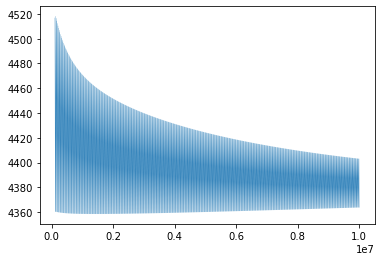

In [31]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

Sieci wykorzystujące jedynie liniową funkcję aktywacji nie są w stanie nauczyć się dobrze zadanej funkcji. Wynika to z tego, że w ten sposób jesteśmy w stanie jedynie przybliżać funkcję prostą - jest to równoważne regresji liniowej. 

Funkcja sigmoid najlepiej poradziła sobie na 1 warstwie. Podobnie tanh najgorzej poradził sobie na 3 warstwach.

ReLU lepiej radziła sobie z większą liczbą wastw. Przy 2 lub 3 warstwach widać było duże fluktuacje MSE od pewnego momentu.

Żadnej z sieci nie udało się osiągnąć dobrych wyników. Liczba neuronów w warstwach mogła być do tego za mała, spodziewałem się ryzyka wystąpienia takiego problemu, jednak ze względu na możliwości obliczeniowe postanowiłem "nie przesadzać" z liczbą neuronów, nie skupiając się na osiągnięciu bardzo dobrych rezultatów, a zamiast tego potraktować to zadanie jako porównanie funkcji aktywacji na prostych i z góry narzuconych architekturach. 

Na `multimodal` najlepiej poradziła sobie 3-warstwowa sieć z aktywacją ReLU oraz 1-warstwowa z sigmoidą. Do porównania na zbiorze `steps-large` wybieram te 2 architektury.

## testy na steps-large

In [49]:
def steps_test(n_hidden=1, activation="identity", eta=0.001):
    net = mn.Net(1)
    for i in range(n_hidden):
        net.add(mn.DenseLayer(15, activation))
    net.add(mn.DenseLayer(1, "identity"))
    net.kernel_init("xavier")

    mse, iters, mses_history = net.backpropagate(steps_train_X, steps_train_Y, 
                                   eta=eta, n_epochs=1000,
                                   required_loss=1, 
                                   verbose=1,
                                   validation_input=steps_val_X, 
                                   validation_output=steps_val_Y,
                                  )
    return mses_history, net

### ReLU - 3 warstwy

In [50]:
mses_history, net = steps_test(3, "ReLU", 0.000000033)

mse after 10000 iterations (epoch 0): 8633.547037662876
mse after 20000 iterations (epoch 1): 8632.266202506366
mse after 30000 iterations (epoch 2): 8631.033273292272
mse after 40000 iterations (epoch 3): 8629.795130072884
mse after 50000 iterations (epoch 4): 8628.55258290798
mse after 60000 iterations (epoch 5): 8627.313663558332
mse after 70000 iterations (epoch 6): 8626.091550398181
mse after 80000 iterations (epoch 7): 8624.882526088764
mse after 90000 iterations (epoch 8): 8623.676427251861
mse after 100000 iterations (epoch 9): 8622.476267227157
mse after 110000 iterations (epoch 10): 8621.278568755399
mse after 120000 iterations (epoch 11): 8620.07330421386
mse after 130000 iterations (epoch 12): 8618.851866022915
mse after 140000 iterations (epoch 13): 8617.611327498811
mse after 150000 iterations (epoch 14): 8616.34913535126
mse after 160000 iterations (epoch 15): 8615.062452787935
mse after 170000 iterations (epoch 16): 8613.747470127137
mse after 180000 iterations (epoch 1

mse after 1410000 iterations (epoch 140): 553.8866964117378
mse after 1420000 iterations (epoch 141): 549.1013870690753
mse after 1430000 iterations (epoch 142): 545.6226956296093
mse after 1440000 iterations (epoch 143): 543.0604909559686
mse after 1450000 iterations (epoch 144): 541.1523356397455
mse after 1460000 iterations (epoch 145): 539.6632726816157
mse after 1470000 iterations (epoch 146): 538.4357855502806
mse after 1480000 iterations (epoch 147): 537.4184548117698
mse after 1490000 iterations (epoch 148): 536.5780634094269
mse after 1500000 iterations (epoch 149): 535.8773070829799
mse after 1510000 iterations (epoch 150): 535.208958138661
mse after 1520000 iterations (epoch 151): 534.6799954146234
mse after 1530000 iterations (epoch 152): 534.2155259136944
mse after 1540000 iterations (epoch 153): 533.8375827245844
mse after 1550000 iterations (epoch 154): 533.449687863015
mse after 1560000 iterations (epoch 155): 533.1058683689588
mse after 1570000 iterations (epoch 156): 

mse after 2780000 iterations (epoch 277): 512.7145564697983
mse after 2790000 iterations (epoch 278): 512.5505849374806
mse after 2800000 iterations (epoch 279): 512.3910390874341
mse after 2810000 iterations (epoch 280): 512.2254518689766
mse after 2820000 iterations (epoch 281): 512.0573273045009
mse after 2830000 iterations (epoch 282): 511.88447592760474
mse after 2840000 iterations (epoch 283): 511.7175118096293
mse after 2850000 iterations (epoch 284): 511.5441093703301
mse after 2860000 iterations (epoch 285): 511.3841418876112
mse after 2870000 iterations (epoch 286): 511.21128405726495
mse after 2880000 iterations (epoch 287): 511.0501088400013
mse after 2890000 iterations (epoch 288): 510.88369126131545
mse after 2900000 iterations (epoch 289): 510.7280079236045
mse after 2910000 iterations (epoch 290): 510.55263684830834
mse after 2920000 iterations (epoch 291): 510.3958840705589
mse after 2930000 iterations (epoch 292): 510.20929684615277
mse after 2940000 iterations (epoch

mse after 4140000 iterations (epoch 413): 439.2407077934628
mse after 4150000 iterations (epoch 414): 438.4000525999898
mse after 4160000 iterations (epoch 415): 437.23055716301485
mse after 4170000 iterations (epoch 416): 436.39007940520804
mse after 4180000 iterations (epoch 417): 435.3344211661727
mse after 4190000 iterations (epoch 418): 434.5798549016132
mse after 4200000 iterations (epoch 419): 433.50363879374726
mse after 4210000 iterations (epoch 420): 432.85273320547685
mse after 4220000 iterations (epoch 421): 431.744152993658
mse after 4230000 iterations (epoch 422): 431.28848729058643
mse after 4240000 iterations (epoch 423): 430.0734393730172
mse after 4250000 iterations (epoch 424): 429.73628765499507
mse after 4260000 iterations (epoch 425): 428.6100431622006
mse after 4270000 iterations (epoch 426): 428.3790830477619
mse after 4280000 iterations (epoch 427): 427.2574183518009
mse after 4290000 iterations (epoch 428): 427.09809384004603
mse after 4300000 iterations (epoc

mse after 5500000 iterations (epoch 549): 398.84971195525833
mse after 5510000 iterations (epoch 550): 398.9534385583776
mse after 5520000 iterations (epoch 551): 398.7027955799691
mse after 5530000 iterations (epoch 552): 398.80769805836815
mse after 5540000 iterations (epoch 553): 398.5641358756909
mse after 5550000 iterations (epoch 554): 398.66347844879135
mse after 5560000 iterations (epoch 555): 398.42797256248525
mse after 5570000 iterations (epoch 556): 398.52273236403033
mse after 5580000 iterations (epoch 557): 398.29189699361933
mse after 5590000 iterations (epoch 558): 398.38476896389847
mse after 5600000 iterations (epoch 559): 398.15785392529807
mse after 5610000 iterations (epoch 560): 398.24337133708457
mse after 5620000 iterations (epoch 561): 398.0327648276013
mse after 5630000 iterations (epoch 562): 398.09630762382994
mse after 5640000 iterations (epoch 563): 397.89641638085016
mse after 5650000 iterations (epoch 564): 397.95008356200077
mse after 5660000 iterations

mse after 6860000 iterations (epoch 685): 390.72304653886056
mse after 6870000 iterations (epoch 686): 390.69595586479977
mse after 6880000 iterations (epoch 687): 390.66533781746494
mse after 6890000 iterations (epoch 688): 390.6359948965077
mse after 6900000 iterations (epoch 689): 390.60617759848526
mse after 6910000 iterations (epoch 690): 390.5729489472052
mse after 6920000 iterations (epoch 691): 390.5441595827491
mse after 6930000 iterations (epoch 692): 390.5147746376732
mse after 6940000 iterations (epoch 693): 390.4866267675924
mse after 6950000 iterations (epoch 694): 390.4576505595618
mse after 6960000 iterations (epoch 695): 390.42716611444524
mse after 6970000 iterations (epoch 696): 390.3934185554705
mse after 6980000 iterations (epoch 697): 390.3619850492582
mse after 6990000 iterations (epoch 698): 390.3329381975862
mse after 7000000 iterations (epoch 699): 390.30127562527423
mse after 7010000 iterations (epoch 700): 390.2732079884327
mse after 7020000 iterations (epoc

mse after 8220000 iterations (epoch 821): 386.8655029359643
mse after 8230000 iterations (epoch 822): 386.8330729506917
mse after 8240000 iterations (epoch 823): 386.8045939356721
mse after 8250000 iterations (epoch 824): 386.77813348984137
mse after 8260000 iterations (epoch 825): 386.746567196294
mse after 8270000 iterations (epoch 826): 386.72183945976707
mse after 8280000 iterations (epoch 827): 386.6899744978932
mse after 8290000 iterations (epoch 828): 386.6651857625058
mse after 8300000 iterations (epoch 829): 386.63406193358725
mse after 8310000 iterations (epoch 830): 386.61114662014444
mse after 8320000 iterations (epoch 831): 386.57365109128597
mse after 8330000 iterations (epoch 832): 386.55248109158606
mse after 8340000 iterations (epoch 833): 386.5143382600653
mse after 8350000 iterations (epoch 834): 386.49356053602946
mse after 8360000 iterations (epoch 835): 386.45944624421327
mse after 8370000 iterations (epoch 836): 386.436091718073
mse after 8380000 iterations (epoc

mse after 9580000 iterations (epoch 957): 382.79982317874664
mse after 9590000 iterations (epoch 958): 382.76811272042585
mse after 9600000 iterations (epoch 959): 382.73490931953404
mse after 9610000 iterations (epoch 960): 382.7025548557334
mse after 9620000 iterations (epoch 961): 382.6686724965157
mse after 9630000 iterations (epoch 962): 382.6377874000923
mse after 9640000 iterations (epoch 963): 382.6050435620604
mse after 9650000 iterations (epoch 964): 382.57302611568286
mse after 9660000 iterations (epoch 965): 382.54124657226794
mse after 9670000 iterations (epoch 966): 382.5091197646558
mse after 9680000 iterations (epoch 967): 382.47716176260326
mse after 9690000 iterations (epoch 968): 382.4449479370968
mse after 9700000 iterations (epoch 969): 382.41313041674005
mse after 9710000 iterations (epoch 970): 382.3801875806662
mse after 9720000 iterations (epoch 971): 382.34810355002435
mse after 9730000 iterations (epoch 972): 382.31735622373924
mse after 9740000 iterations (e

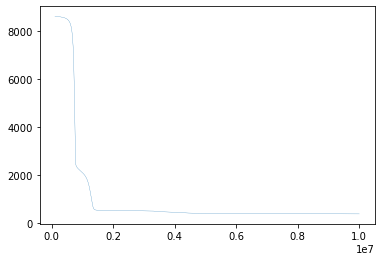

In [51]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

### sigmoid - 1 warstwa

In [53]:
mses_history, net = steps_test(1, "sigmoid", 0.0000004)

mse after 10000 iterations (epoch 0): 8636.97909846088
mse after 20000 iterations (epoch 1): 8604.043516914167
mse after 30000 iterations (epoch 2): 8571.660629715203
mse after 40000 iterations (epoch 3): 8539.167346162141
mse after 50000 iterations (epoch 4): 8505.957019188874
mse after 60000 iterations (epoch 5): 8471.478805078217
mse after 70000 iterations (epoch 6): 8435.23736726458
mse after 80000 iterations (epoch 7): 8396.79354462312
mse after 90000 iterations (epoch 8): 8355.766552199062
mse after 100000 iterations (epoch 9): 8311.837912257237
mse after 110000 iterations (epoch 10): 8264.756650998948
mse after 120000 iterations (epoch 11): 8214.344547155375
mse after 130000 iterations (epoch 12): 8160.4997101186
mse after 140000 iterations (epoch 13): 8103.196786771388
mse after 150000 iterations (epoch 14): 8042.482732485179
mse after 160000 iterations (epoch 15): 7978.468139575513
mse after 170000 iterations (epoch 16): 7911.315199138355
mse after 180000 iterations (epoch 17)

mse after 1410000 iterations (epoch 140): 1837.9038325461647
mse after 1420000 iterations (epoch 141): 1823.567267727119
mse after 1430000 iterations (epoch 142): 1809.4960042397956
mse after 1440000 iterations (epoch 143): 1795.6846786615358
mse after 1450000 iterations (epoch 144): 1782.1280248721027
mse after 1460000 iterations (epoch 145): 1768.8208728620361
mse after 1470000 iterations (epoch 146): 1755.758147505689
mse after 1480000 iterations (epoch 147): 1742.9348673045624
mse after 1490000 iterations (epoch 148): 1730.3461431059964
mse after 1500000 iterations (epoch 149): 1717.9871768017729
mse after 1510000 iterations (epoch 150): 1705.8532600107342
mse after 1520000 iterations (epoch 151): 1693.9397727491255
mse after 1530000 iterations (epoch 152): 1682.242182091962
mse after 1540000 iterations (epoch 153): 1670.7560408284226
mse after 1550000 iterations (epoch 154): 1659.4769861139491
mse after 1560000 iterations (epoch 155): 1648.4007381214492
mse after 1570000 iteration

mse after 2760000 iterations (epoch 275): 1034.7206807781336
mse after 2770000 iterations (epoch 276): 1031.9785784612197
mse after 2780000 iterations (epoch 277): 1029.244942402805
mse after 2790000 iterations (epoch 278): 1026.5195228950881
mse after 2800000 iterations (epoch 279): 1023.8020874894049
mse after 2810000 iterations (epoch 280): 1021.0924213270939
mse after 2820000 iterations (epoch 281): 1018.3903274722816
mse after 2830000 iterations (epoch 282): 1015.6956272430973
mse after 2840000 iterations (epoch 283): 1013.0081605373362
mse after 2850000 iterations (epoch 284): 1010.3277861480362
mse after 2860000 iterations (epoch 285): 1007.6543820638759
mse after 2870000 iterations (epoch 286): 1004.9878457486651
mse after 2880000 iterations (epoch 287): 1002.3280943935791
mse after 2890000 iterations (epoch 288): 999.6750651351045
mse after 2900000 iterations (epoch 289): 997.0287152309963
mse after 2910000 iterations (epoch 290): 994.3890221858643
mse after 2920000 iterations

mse after 4130000 iterations (epoch 412): 738.3608561338559
mse after 4140000 iterations (epoch 413): 736.7299076795248
mse after 4150000 iterations (epoch 414): 735.1052200854764
mse after 4160000 iterations (epoch 415): 733.4867702093425
mse after 4170000 iterations (epoch 416): 731.8745351880677
mse after 4180000 iterations (epoch 417): 730.2684924411229
mse after 4190000 iterations (epoch 418): 728.6686196726762
mse after 4200000 iterations (epoch 419): 727.0748948727994
mse after 4210000 iterations (epoch 420): 725.4872963177729
mse after 4220000 iterations (epoch 421): 723.9058025695601
mse after 4230000 iterations (epoch 422): 722.3303924745135
mse after 4240000 iterations (epoch 423): 720.7610451613685
mse after 4250000 iterations (epoch 424): 719.19774003859
mse after 4260000 iterations (epoch 425): 717.640456791117
mse after 4270000 iterations (epoch 426): 716.0891753765643
mse after 4280000 iterations (epoch 427): 714.543876020927
mse after 4290000 iterations (epoch 428): 71

mse after 5500000 iterations (epoch 549): 565.9510843127852
mse after 5510000 iterations (epoch 550): 565.0216876549969
mse after 5520000 iterations (epoch 551): 564.0963316572995
mse after 5530000 iterations (epoch 552): 563.1750000901241
mse after 5540000 iterations (epoch 553): 562.257676729253
mse after 5550000 iterations (epoch 554): 561.344345356674
mse after 5560000 iterations (epoch 555): 560.434989761424
mse after 5570000 iterations (epoch 556): 559.5295937404197
mse after 5580000 iterations (epoch 557): 558.6281410992746
mse after 5590000 iterations (epoch 558): 557.730615653106
mse after 5600000 iterations (epoch 559): 556.8370012273247
mse after 5610000 iterations (epoch 560): 555.9472816584165
mse after 5620000 iterations (epoch 561): 555.0614407947088
mse after 5630000 iterations (epoch 562): 554.1794624971224
mse after 5640000 iterations (epoch 563): 553.3013306399167
mse after 5650000 iterations (epoch 564): 552.4270291114135
mse after 5660000 iterations (epoch 565): 55

mse after 6870000 iterations (epoch 686): 469.7631897628432
mse after 6880000 iterations (epoch 687): 469.2462725991565
mse after 6890000 iterations (epoch 688): 468.73143206376426
mse after 6900000 iterations (epoch 689): 468.21865649495646
mse after 6910000 iterations (epoch 690): 467.70793427289027
mse after 6920000 iterations (epoch 691): 467.19925381955926
mse after 6930000 iterations (epoch 692): 466.6926035987626
mse after 6940000 iterations (epoch 693): 466.18797211607324
mse after 6950000 iterations (epoch 694): 465.68534791880427
mse after 6960000 iterations (epoch 695): 465.1847195959752
mse after 6970000 iterations (epoch 696): 464.6860757782785
mse after 6980000 iterations (epoch 697): 464.18940513804245
mse after 6990000 iterations (epoch 698): 463.6946963891975
mse after 7000000 iterations (epoch 699): 463.2019382872378
mse after 7010000 iterations (epoch 700): 462.711119629185
mse after 7020000 iterations (epoch 701): 462.222229253551
mse after 7030000 iterations (epoch

mse after 8230000 iterations (epoch 822): 414.304687025359
mse after 8240000 iterations (epoch 823): 413.97998368247363
mse after 8250000 iterations (epoch 824): 413.65614933960006
mse after 8260000 iterations (epoch 825): 413.33317804001643
mse after 8270000 iterations (epoch 826): 413.0110638720939
mse after 8280000 iterations (epoch 827): 412.6898009692528
mse after 8290000 iterations (epoch 828): 412.36938350991096
mse after 8300000 iterations (epoch 829): 412.04980571742374
mse after 8310000 iterations (epoch 830): 411.73106186001587
mse after 8320000 iterations (epoch 831): 411.4131462507054
mse after 8330000 iterations (epoch 832): 411.0960532472185
mse after 8340000 iterations (epoch 833): 410.7797772518972
mse after 8350000 iterations (epoch 834): 410.46431271159634
mse after 8360000 iterations (epoch 835): 410.149654117574
mse after 8370000 iterations (epoch 836): 409.8357960053716
mse after 8380000 iterations (epoch 837): 409.52273295468683
mse after 8390000 iterations (epoc

mse after 9590000 iterations (epoch 958): 376.2234874337514
mse after 9600000 iterations (epoch 959): 375.9778312300776
mse after 9610000 iterations (epoch 960): 375.73255195305774
mse after 9620000 iterations (epoch 961): 375.4876475297669
mse after 9630000 iterations (epoch 962): 375.2431159020845
mse after 9640000 iterations (epoch 963): 374.99895502665606
mse after 9650000 iterations (epoch 964): 374.75516287485715
mse after 9660000 iterations (epoch 965): 374.5117374327603
mse after 9670000 iterations (epoch 966): 374.2686767011002
mse after 9680000 iterations (epoch 967): 374.02597869524436
mse after 9690000 iterations (epoch 968): 373.78364144516286
mse after 9700000 iterations (epoch 969): 373.54166299539884
mse after 9710000 iterations (epoch 970): 373.300041405043
mse after 9720000 iterations (epoch 971): 373.05877474770506
mse after 9730000 iterations (epoch 972): 372.81786111149086
mse after 9740000 iterations (epoch 973): 372.5772985989766
mse after 9750000 iterations (epo

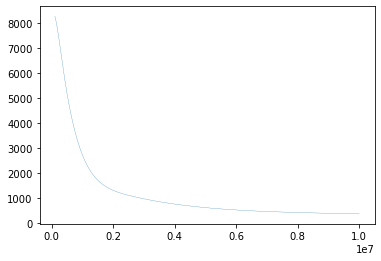

In [54]:
iters, mses = zip(*mses_history[10:])
plt.plot(iters, mses, linewidth=0.25)

Obu sieciom udało się osiągnąć podobne MSE, na poziomie około 370. Oznacza to znowu słaby wynik.

3-warstwowa sieć z ReLU uczyła się dużo gwałtowniej.